In [25]:
!pip install pandas numpy matplotlib seaborn
!pip install pandas


In [26]:
import pandas as pd

# Specify the path to your data file
data_file_path = 'Employee_Attrition.csv'

# Load the data into a DataFrame
data = pd.read_csv(data_file_path)

# Display the first few rows of the DataFrame
print(data.head())


         Age Attrition     BusinessTravel    DailyRate  \
0  41.920786       Yes      Travel_Rarely   990.110009   
1  51.589037        No  Travel_Frequently   276.776030   
2  33.131540       Yes      Travel_Rarely  1204.158501   
3  34.707073        No  Travel_Frequently  1352.752432   
4  24.790188        No      Travel_Rarely   485.053333   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales          1.016716   1.770313  Life Sciences   
1  Research & Development               NaN   1.035333  Life Sciences   
2  Research & Development          2.198662   2.118801          Other   
3                   Sales          2.937851   3.670674  Life Sciences   
4  Research & Development          1.988953   1.120496        Medical   

   EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0       1.033298        1.054148  ...                  1.012832     95.612654   
1       0.944859        2.107031  ...             

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
import pandas as pd


data['WorkLevelInteraction'] = data['TotalWorkingYears'] * data['JobLevel']
data['CommuteJobSatisfaction'] = data['DistanceFromHome'] * data['JobSatisfaction']

# Binning 'Age'
bins = [0, 25, 35, 45, 55, 65, np.inf]
labels = ['Under25', '25-35', '35-45', '45-55', '55-65', '65+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)
data['IncomeToWorkingYearsRatio'] = data['MonthlyIncome'] / (data['TotalWorkingYears'] + 1)
data['RateToHoursRatio'] = data['DailyRate'] / (data['HourlyRate'] + 1)
department_income = data.groupby('Department')['MonthlyIncome'].transform('mean')
data['DeptAvgMonthlyIncome'] = department_income
data['DistanceFromHomeCategory'] = pd.cut(data['DistanceFromHome'], 
                                          bins=[0, 5, 10, np.inf], 
                                          labels=['Near', 'Medium', 'Far'])
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 25, 35, 45, 55, 65], labels=[1, 2, 3, 4, 5])
data['WorkLevelInteraction'] = data['TotalWorkingYears'] * data['JobLevel']



Creating new columns:

data['WorkLevelInteraction'] is creating a new column called 'WorkLevelInteraction' by multiplying the 'TotalWorkingYears' column with the 'JobLevel' column.
data['CommuteJobSatisfaction'] is creating a new column called 'CommuteJobSatisfaction' by multiplying the 'DistanceFromHome' column with the 'JobSatisfaction' column.
Binning the 'Age' column:

It defines bins for different age groups and assigns labels to those bins.
The 'Age' column is then binned using these bins and labels, and the result is stored in a new column called 'AgeGroup'.
Calculating ratios:

data['IncomeToWorkingYearsRatio'] calculates the ratio of 'MonthlyIncome' to ('TotalWorkingYears' + 1) and stores it in a new column.
data['RateToHoursRatio'] calculates the ratio of 'DailyRate' to ('HourlyRate' + 1) and stores it in a new column.
Calculating department-wise average income:

It groups the data by the 'Department' column and calculates the mean of 'MonthlyIncome' for each group.
The result is stored in a new column called 'DeptAvgMonthlyIncome'.
Binning the 'DistanceFromHome' column:

It defines bins for different distance categories ('Near', 'Medium', 'Far') and assigns labels to those bins.
The 'DistanceFromHome' column is then binned using these bins and labels, and the result is stored in a new column called 'DistanceFromHomeCategory'.

In [29]:
# List all columns in the DataFrame
column_names = data.columns

# Print the column names
print("Columns in the DataFrame:")
print(column_names)


Columns in the DataFrame:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'WorkLevelInteraction',
       'CommuteJobSatisfaction', 'AgeGroup', 'IncomeToWorkingYearsRatio',
       'RateToHoursRatio', 'DeptAvgMonthlyIncome', 'DistanceFromHomeCategory'],
      dtype='object')


In [30]:
# Convert columns to whole numbers
whole_number_columns = ['EmployeeNumber', 'Age', 'EmployeeCount', 'NumCompaniesWorked', 'TrainingTimesLastYear']
data[whole_number_columns] = data[whole_number_columns].fillna(0).round(0).astype(int)

# Convert columns to 1 decimal point
one_decimal_columns = ['DistanceFromHome', 'EnvironmentSatisfaction', 'PercentSalaryHike', 
                       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 
                       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 
                       'YearsInCurrentRole', 'YearsWithCurrManager']
data[one_decimal_columns] = data[one_decimal_columns].round(1)

# Print the updated DataFrame
print(data)



      Age Attrition     BusinessTravel    DailyRate              Department  \
0      42       Yes      Travel_Rarely   990.110009                   Sales   
1      52        No  Travel_Frequently   276.776030  Research & Development   
2      33       Yes      Travel_Rarely  1204.158501  Research & Development   
3      35        No  Travel_Frequently  1352.752432                   Sales   
4      25        No      Travel_Rarely   485.053333  Research & Development   
...   ...       ...                ...          ...                     ...   
1465   37        No  Travel_Frequently   914.061807  Research & Development   
1466   35        No                NaN   574.675152  Research & Development   
1467   27        No      Travel_Rarely   151.506083  Research & Development   
1468    0        No  Travel_Frequently   995.977086         Human Resources   
1469   38        No      Travel_Rarely   703.677110  Research & Development   

      DistanceFromHome  Education EducationField  E

Converting columns to whole numbers:

It defines a list of column names (whole_number_columns) that are intended to be converted to whole numbers.
The fillna(0) method is used to fill any missing values in these columns with 0.
The round(0) method is used to round the values in these columns to the nearest whole number.
Finally, the astype(int) method is used to convert the values in these columns to integer data type.
Converting columns to 1 decimal point:

It defines a list of column names (one_decimal_columns) that are intended to be rounded to one decimal point.
The round(1) method is applied to these columns to round the values to one decimal point.
Printing the updated DataFrame:

After applying the conversions and rounding operations to the specified columns, the code prints the updated DataFrame, which now contains the modified values.

In [31]:
# Convert categorical columns to 'category' data type if not already
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].astype('category')

# Add 'Unknown' as a category and fill NaN values for categorical columns
for col in categorical_columns:
    data[col] = data[col].cat.add_categories('Unknown').fillna('Unknown')

# Fill NaNs for numeric columns with a placeholder or central tendency measure
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(0)  # or use .fillna(data[numeric_columns].median()) for median

# Convert columns to whole numbers
whole_number_columns = ['EmployeeNumber', 'Age', 'EmployeeCount', 'NumCompaniesWorked', 'TrainingTimesLastYear']
data[whole_number_columns] = data[whole_number_columns].fillna(0).round(0).astype(int)

# Convert columns to 1 decimal point
one_decimal_columns = ['DistanceFromHome', 'EnvironmentSatisfaction', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours', 
                       'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                       'YearsWithCurrManager', 'HourlyRate', 'DailyRate', 'MonthlyIncome', 'MonthlyRate']
data[one_decimal_columns] = data[one_decimal_columns].round(1)

print(data)


      Age Attrition     BusinessTravel  DailyRate              Department  \
0      42       Yes      Travel_Rarely      990.1                   Sales   
1      52        No  Travel_Frequently      276.8  Research & Development   
2      33       Yes      Travel_Rarely     1204.2  Research & Development   
3      35        No  Travel_Frequently     1352.8                   Sales   
4      25        No      Travel_Rarely      485.1  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   37        No  Travel_Frequently      914.1  Research & Development   
1466   35        No            Unknown      574.7  Research & Development   
1467   27        No      Travel_Rarely      151.5  Research & Development   
1468    0        No  Travel_Frequently      996.0         Human Resources   
1469   38        No      Travel_Rarely      703.7  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

Converting categorical columns to the 'category' data type:

It identifies columns with object data type (likely representing categorical variables) using data.select_dtypes(include=['object']).columns.
The code converts these categorical columns to the 'category' data type using data[categorical_columns].astype('category').
Adding 'Unknown' as a category and filling NaN values for categorical columns:

For each categorical column, it adds 'Unknown' as a category using data[col].cat.add_categories('Unknown').
It then fills any missing (NaN) values in these categorical columns with 'Unknown' using .fillna('Unknown'). This is done to handle missing categorical data.
Filling NaNs for numeric columns:

It identifies columns with numeric data types (float64 and int64) using data.select_dtypes(include=['float64', 'int64']).columns.
The code fills missing (NaN) values in these numeric columns with either 0 or the median of the respective column values, depending on the chosen method. The code currently uses fillna(0) to fill with zeros, but you can also use fillna(data[numeric_columns].median()) to fill with median values.
Converting columns to whole numbers:

It defines a list of column names (whole_number_columns) that are intended to be converted to whole numbers.
The fillna(0) method is used to fill any missing values in these columns with 0.
The round(0) method is used to round the values in these columns to the nearest whole number.
Finally, the astype(int) method is used to convert the values in these columns to integer data type.
Converting columns to 1 decimal point:

It defines a list of column names (one_decimal_columns) that are intended to be rounded to one decimal point.
The round(1) method is applied to these columns to round the values to one decimal point.
Printing the updated DataFrame:

After applying all the preprocessing steps, the code prints the updated DataFrame, which now contains the modified values and data types.

In [32]:
data.head(80)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,WorkLevelInteraction,CommuteJobSatisfaction,AgeGroup,IncomeToWorkingYearsRatio,RateToHoursRatio,DeptAvgMonthlyIncome,DistanceFromHomeCategory
0,42,Yes,Travel_Rarely,990.1,Sales,1.0,1.770313,Life Sciences,1,1,...,4.0,0.000000,4.6,19.873250,3.454460,3,710.400298,10.441171,7057.280356,Near
1,52,No,Travel_Frequently,276.8,Research & Development,0.0,1.035333,Life Sciences,1,2,...,7.9,1.032295,5.9,16.035775,0.000000,4,447.328972,5.192391,6225.450462,NaN
2,33,Yes,Travel_Rarely,1204.2,Research & Development,2.2,2.118801,Other,1,4,...,0.0,0.000000,0.0,7.024003,7.257803,2,225.362415,13.641558,6225.450462,Near
3,35,No,Travel_Frequently,1352.8,Sales,2.9,3.670674,Life Sciences,1,5,...,5.6,2.845429,0.0,8.393402,9.462360,2,319.961335,23.575748,7057.280356,Near
4,25,No,Travel_Rarely,485.1,Research & Development,2.0,1.120496,Medical,0,7,...,2.0,2.495949,2.2,5.853162,3.375908,1,449.423006,11.706682,6225.450462,Near
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,37,No,Travel_Rarely,681.8,Research & Development,9.4,4.485903,Life Sciences,1,87,...,7.3,0.917400,7.2,23.005656,33.609236,3,343.098532,12.025441,6225.450462,Medium
76,32,Yes,Travel_Rarely,782.2,Sales,0.8,3.563288,Technical Degree,0,100,...,13.4,1.978586,0.0,0.000000,0.748828,2,0.000000,25.300603,7057.280356,Near
77,52,No,Travel_Rarely,189.5,Research & Development,5.2,0.000000,Other,1,98,...,0.0,0.000000,0.0,54.302214,5.738755,4,0.000000,3.360659,6225.450462,Medium
78,46,No,Unknown,396.2,Research & Development,6.6,0.000000,Medical,1,111,...,1.9,0.000000,2.1,30.249964,15.598408,4,1050.169328,15.354213,6225.450462,Medium


In [33]:
import pandas as pd

# Define bins and labels for 5-year intervals
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['0-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100']

# Bin the ages using cut
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

print(data)


      Age Attrition     BusinessTravel  DailyRate              Department  \
0      42       Yes      Travel_Rarely      990.1                   Sales   
1      52        No  Travel_Frequently      276.8  Research & Development   
2      33       Yes      Travel_Rarely     1204.2  Research & Development   
3      35        No  Travel_Frequently     1352.8                   Sales   
4      25        No      Travel_Rarely      485.1  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   37        No  Travel_Frequently      914.1  Research & Development   
1466   35        No            Unknown      574.7  Research & Development   
1467   27        No      Travel_Rarely      151.5  Research & Development   
1468    0        No  Travel_Frequently      996.0         Human Resources   
1469   38        No      Travel_Rarely      703.7  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

Binning the ages using pd.cut:

pd.cut(data['Age'], bins=bins, labels=labels, right=False) takes the 'Age' column from the DataFrame 'data' and bins the ages into the specified intervals using the 'bins' and 'labels' lists.
right=False indicates that the intervals are left-inclusive (the left bin boundary is included), and the right bin boundary is exclusive. In other words, if a person's age is exactly on the upper boundary of an interval, they will be categorized into the previous age group.
Creating the 'AgeGroup' column:

The result of the pd.cut function is assigned to a new column named 'AgeGroup' in the 'data' DataFrame. This column will contain the age group labels corresponding to each individual's age.
Printing the updated DataFrame:

The code prints the updated DataFrame 'data,' which now includes the 'AgeGroup' column with age group labels assigned to each individual based on their age.

In [34]:
import pandas as pd
# Clean the 'BusinessTravel' column by removing 'Travel_'
data['BusinessTravel'] = data['BusinessTravel'].str.replace('Travel_', '')

# Display a sample of the modified DataFrame
print(data[['BusinessTravel']].head())


  BusinessTravel
0         Rarely
1     Frequently
2         Rarely
3     Frequently
4         Rarely


Cleaning the 'BusinessTravel' column:

data['BusinessTravel'].str.replace('Travel_', '') accesses the 'BusinessTravel' column in the DataFrame 'data' and applies the .str.replace() method. This method is used to find and replace a specified substring in each value of the column.
In this case, it replaces all occurrences of 'Travel_' with an empty string (''), effectively removing the 'Travel_' prefix from each value in the 'BusinessTravel' column.
Displaying a sample of the modified DataFrame:

print(data[['BusinessTravel']].head()) prints the first few rows of the 'BusinessTravel' column from the modified DataFrame. This is done to verify the changes made to the 'BusinessTravel' column.

In [35]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

numeric_columns_nan_counts = data.select_dtypes(include=['number']).isna().sum()
print(numeric_columns_nan_counts)


Age                          0
DailyRate                    0
DistanceFromHome             0
Education                    0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobSatisfaction              0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
WorkLevelInteraction         0
CommuteJobSatisfaction       0
IncomeToWorkingYearsRatio    0
RateToHoursRatio             0
DeptAvgMonthlyIncome         0
dtype: int64


In [36]:
# Check for NaN values in categorical columns and display the counts
categorical_columns_nan_counts = data.select_dtypes(include=['object', 'category']).isna().sum()
print(categorical_columns_nan_counts)


Attrition                     0
BusinessTravel                0
Department                    0
EducationField                0
Gender                        0
JobRole                       0
MaritalStatus                 0
Over18                        0
OverTime                      0
AgeGroup                      0
DistanceFromHomeCategory    147
dtype: int64


In [37]:
data.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,WorkLevelInteraction,CommuteJobSatisfaction,AgeGroup,IncomeToWorkingYearsRatio,RateToHoursRatio,DeptAvgMonthlyIncome,DistanceFromHomeCategory
0,42,Yes,Rarely,990.1,Sales,1.0,1.770313,Life Sciences,1,1,2.1,Male,93.8,3.426960,2.464492,Sales Executive,3.397665,Single,6438.9,20845.1,7,Y,Yes,9.9,2.844897,1.0,95.6,0.0,8.1,0,1.1,5.8,4.0,0.000000,4.6,19.873250,3.454460,41-45,710.400298,10.441171,7057.280356,Near
1,52,No,Frequently,276.8,Research & Development,0.0,1.035333,Life Sciences,1,2,3.5,Male,52.3,1.813458,1.788697,Research Scientist,1.584059,Married,4457.7,24877.9,1,Y,No,0.0,4.120281,4.3,85.4,1.1,9.0,3,2.5,10.1,7.9,1.032295,5.9,16.035775,0.000000,51-55,447.328972,5.192391,6225.450462,NaN
2,33,Yes,Rarely,1204.2,Research & Development,2.2,2.118801,Other,1,4,4.0,Male,87.3,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.5,2262.9,6,Y,Yes,15.4,2.781168,2.3,76.2,0.0,8.4,3,2.9,0.0,0.0,0.000000,0.0,7.024003,7.257803,31-35,225.362415,13.641558,6225.450462,Near
3,35,No,Frequently,1352.8,Sales,2.9,3.670674,Life Sciences,1,5,3.7,Female,56.4,2.932646,1.095372,Research Scientist,3.220844,Married,2771.7,27189.9,1,Unknown,Yes,9.8,2.769576,3.0,75.9,0.0,7.7,3,3.1,8.4,5.6,2.845429,0.0,8.393402,9.462360,36-40,319.961335,23.575748,7057.280356,Near
4,25,No,Rarely,485.1,Research & Development,2.0,1.120496,Medical,0,7,1.1,Male,40.4,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.6,17675.5,10,Unknown,Unknown,11.9,3.282183,0.0,72.7,1.0,6.2,3,3.1,2.0,2.0,2.495949,2.2,5.853162,3.375908,26-30,449.423006,11.706682,6225.450462,Near
5,30,No,Frequently,900.5,Research & Development,1.8,0.000000,Life Sciences,1,8,4.2,Male,74.6,2.684099,0.933077,Laboratory Technician,3.283670,Single,3258.6,11576.4,0,Y,No,13.5,3.085446,2.8,0.0,0.0,6.7,2,2.0,6.1,8.4,3.131537,7.1,6.246814,5.928388,31-35,423.483621,11.915930,6225.450462,Near
6,62,Unknown,Unknown,1284.5,Research & Development,2.5,0.000000,Medical,1,11,2.8,Female,82.2,3.464390,0.893611,Laboratory Technician,0.000000,Married,2660.0,10226.2,4,Y,Yes,19.5,4.473227,0.8,80.2,3.2,11.2,0,2.2,0.0,0.0,0.000000,0.0,10.031791,0.000000,61-65,217.562923,15.431104,6225.450462,Near
7,27,No,Rarely,0.0,Research & Development,22.3,0.923262,Life Sciences,1,10,3.2,Male,73.2,3.043275,1.223810,Unknown,2.933982,Divorced,3091.8,14958.4,1,Y,No,21.4,4.173202,2.1,75.0,0.9,1.1,2,0.0,1.0,0.0,0.000000,0.0,1.295271,65.513440,26-30,1502.035267,0.000000,6225.450462,Far
8,30,Unknown,Frequently,195.3,Research & Development,0.0,3.209049,Life Sciences,1,13,4.2,Male,0.0,2.167565,2.748524,Unknown,3.079497,Single,10089.7,8130.1,0,Y,No,0.0,4.395156,2.2,92.0,0.0,10.1,2,3.1,9.9,8.0,1.151091,7.1,27.729732,0.000000,31-35,909.889109,0.000000,6225.450462,NaN
9,35,No,Rarely,1277.9,Research & Development,28.6,3.144818,Technical Degree,0,12,0.0,Male,100.4,3.033108,0.000000,Healthcare Representative,3.359002,Married,5129.6,13762.9,7,Y,No,12.5,2.895479,1.9,86.3,1.9,18.8,3,2.1,6.0,6.4,0.000000,6.4,0.000000,96.128118,36-40,259.002166,12.605717,6225.450462,Far


In [38]:
# Convert 'DistanceFromHomeCategory' to a categorical column
data['DistanceFromHomeCategory'] = data['DistanceFromHomeCategory'].astype('category')

# Add 'Unknown' as a category
data['DistanceFromHomeCategory'] = data['DistanceFromHomeCategory'].cat.add_categories('Unknown')

# Replace NaN values with 'Unknown'
data['DistanceFromHomeCategory'].fillna('Unknown', inplace=True)

# Check the updated column
print(data['DistanceFromHomeCategory'])


0          Near
1       Unknown
2          Near
3          Near
4          Near
5          Near
6          Near
7           Far
8       Unknown
9           Far
10          Far
11          Far
12          Far
13          Far
14          Far
15          Far
16       Medium
17          Far
18         Near
19         Near
20          Far
21       Medium
22       Medium
23          Far
24       Medium
25       Medium
26          Far
27       Medium
28       Medium
29         Near
30         Near
31       Medium
32       Medium
33         Near
34         Near
35         Near
36         Near
37         Near
38         Near
39         Near
40         Near
41         Near
42          Far
43       Medium
44         Near
45          Far
46          Far
47      Unknown
48         Near
49       Medium
50         Near
51         Near
52         Near
53      Unknown
54          Far
55         Near
56          Far
57          Far
58       Medium
59         Near
60         Near
61          Far
62      

onvert 'DistanceFromHomeCategory' to a categorical column:

data['DistanceFromHomeCategory'] = data['DistanceFromHomeCategory'].astype('category') converts the 'DistanceFromHomeCategory' column to a categorical data type.
Add 'Unknown' as a category:

data['DistanceFromHomeCategory'] = data['DistanceFromHomeCategory'].cat.add_categories('Unknown') adds a new category 'Unknown' to the categorical column 'DistanceFromHomeCategory.'
Replace NaN values with 'Unknown':

data['DistanceFromHomeCategory'].fillna('Unknown', inplace=True) replaces any missing (NaN) values in the 'DistanceFromHomeCategory' column with the category 'Unknown.'
Check the updated column:

print(data['DistanceFromHomeCategory']) prints the 'DistanceFromHomeCategory' column to verify the changes made. It will show the modified column with 'Unknown' as a category for previously missing values.

In [39]:

categorical_columns = data.select_dtypes(include=['object', 'category']).columns
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

print(data.isna().sum())


Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

Identify categorical columns:

categorical_columns = data.select_dtypes(include=['object', 'category']).columns identifies columns that are of either 'object' or 'category' data types and stores their column names in the categorical_columns variable.
Fill missing values in categorical columns with 'Unknown':

data[categorical_columns] = data[categorical_columns].fillna('Unknown') fills missing (NaN) values in the identified categorical columns with the string 'Unknown.'
Identify numerical columns:

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns identifies columns that are either of 'float64' or 'int64' data types (numerical columns) and stores their column names in the numerical_columns variable.
Fill missing values in numerical columns with the median of each column:

A loop iterates through each numerical column, and for each column, it fills missing (NaN) values with the median value of that column. 

I think the preprocessing is done. Now I will go back to the previous work.

In [40]:
data.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,WorkLevelInteraction,CommuteJobSatisfaction,AgeGroup,IncomeToWorkingYearsRatio,RateToHoursRatio,DeptAvgMonthlyIncome,DistanceFromHomeCategory
0,42,Yes,Rarely,990.1,Sales,1.0,1.770313,Life Sciences,1,1,2.1,Male,93.8,3.426960,2.464492,Sales Executive,3.397665,Single,6438.9,20845.1,7,Y,Yes,9.9,2.844897,1.0,95.6,0.0,8.1,0,1.1,5.8,4.0,0.000000,4.6,19.873250,3.454460,41-45,710.400298,10.441171,7057.280356,Near
1,52,No,Frequently,276.8,Research & Development,0.0,1.035333,Life Sciences,1,2,3.5,Male,52.3,1.813458,1.788697,Research Scientist,1.584059,Married,4457.7,24877.9,1,Y,No,0.0,4.120281,4.3,85.4,1.1,9.0,3,2.5,10.1,7.9,1.032295,5.9,16.035775,0.000000,51-55,447.328972,5.192391,6225.450462,Unknown
2,33,Yes,Rarely,1204.2,Research & Development,2.2,2.118801,Other,1,4,4.0,Male,87.3,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.5,2262.9,6,Y,Yes,15.4,2.781168,2.3,76.2,0.0,8.4,3,2.9,0.0,0.0,0.000000,0.0,7.024003,7.257803,31-35,225.362415,13.641558,6225.450462,Near
3,35,No,Frequently,1352.8,Sales,2.9,3.670674,Life Sciences,1,5,3.7,Female,56.4,2.932646,1.095372,Research Scientist,3.220844,Married,2771.7,27189.9,1,Unknown,Yes,9.8,2.769576,3.0,75.9,0.0,7.7,3,3.1,8.4,5.6,2.845429,0.0,8.393402,9.462360,36-40,319.961335,23.575748,7057.280356,Near
4,25,No,Rarely,485.1,Research & Development,2.0,1.120496,Medical,0,7,1.1,Male,40.4,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.6,17675.5,10,Unknown,Unknown,11.9,3.282183,0.0,72.7,1.0,6.2,3,3.1,2.0,2.0,2.495949,2.2,5.853162,3.375908,26-30,449.423006,11.706682,6225.450462,Near
5,30,No,Frequently,900.5,Research & Development,1.8,0.000000,Life Sciences,1,8,4.2,Male,74.6,2.684099,0.933077,Laboratory Technician,3.283670,Single,3258.6,11576.4,0,Y,No,13.5,3.085446,2.8,0.0,0.0,6.7,2,2.0,6.1,8.4,3.131537,7.1,6.246814,5.928388,31-35,423.483621,11.915930,6225.450462,Near
6,62,Unknown,Unknown,1284.5,Research & Development,2.5,0.000000,Medical,1,11,2.8,Female,82.2,3.464390,0.893611,Laboratory Technician,0.000000,Married,2660.0,10226.2,4,Y,Yes,19.5,4.473227,0.8,80.2,3.2,11.2,0,2.2,0.0,0.0,0.000000,0.0,10.031791,0.000000,61-65,217.562923,15.431104,6225.450462,Near
7,27,No,Rarely,0.0,Research & Development,22.3,0.923262,Life Sciences,1,10,3.2,Male,73.2,3.043275,1.223810,Unknown,2.933982,Divorced,3091.8,14958.4,1,Y,No,21.4,4.173202,2.1,75.0,0.9,1.1,2,0.0,1.0,0.0,0.000000,0.0,1.295271,65.513440,26-30,1502.035267,0.000000,6225.450462,Far
8,30,Unknown,Frequently,195.3,Research & Development,0.0,3.209049,Life Sciences,1,13,4.2,Male,0.0,2.167565,2.748524,Unknown,3.079497,Single,10089.7,8130.1,0,Y,No,0.0,4.395156,2.2,92.0,0.0,10.1,2,3.1,9.9,8.0,1.151091,7.1,27.729732,0.000000,31-35,909.889109,0.000000,6225.450462,Unknown
9,35,No,Rarely,1277.9,Research & Development,28.6,3.144818,Technical Degree,0,12,0.0,Male,100.4,3.033108,0.000000,Healthcare Representative,3.359002,Married,5129.6,13762.9,7,Y,No,12.5,2.895479,1.9,86.3,1.9,18.8,3,2.1,6.0,6.4,0.000000,6.4,0.000000,96.128118,36-40,259.002166,12.605717,6225.450462,Far


In [41]:
# Convert 'Attrition' to a categorical type
data['Attrition'] = data['Attrition'].astype('category')

# Display the data types of the columns to confirm the conversion
data.dtypes

Age                             int32
Attrition                    category
BusinessTravel                 object
DailyRate                     float64
Department                   category
DistanceFromHome              float64
Education                     float64
EducationField               category
EmployeeCount                   int32
EmployeeNumber                  int32
EnvironmentSatisfaction       float64
Gender                       category
HourlyRate                    float64
JobInvolvement                float64
JobLevel                      float64
JobRole                      category
JobSatisfaction               float64
MaritalStatus                category
MonthlyIncome                 float64
MonthlyRate                   float64
NumCompaniesWorked              int32
Over18                       category
OverTime                     category
PercentSalaryHike             float64
PerformanceRating             float64
RelationshipSatisfaction      float64
StandardHour

Statistical Analysis-Explore and evaluate datasets using descriptive statistical analyses. (Linked to PLO 1)
● Formulate and test hypotheses within a business context using appropriate statistical techniques
and both evaluate and communicate the results effectively to peers and team members. (Linked to
PLO 3, PLO 6)
● Use and understand current software tools and languages to produce result sets from existing
data(e.g. Excel, R, Python). (Linked to PLO 4 )

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive Statistics
desc_stats = data.describe()
print("Descriptive Statistics:\n", desc_stats)



Descriptive Statistics:
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000    1470.000000   
mean     32.972789   721.826599          8.179932     2.631102       0.900000   
std      14.453440   460.651915          8.224401     1.343239       0.300102   
min       0.000000     0.000000          0.000000     0.000000       0.000000   
25%      27.000000   337.850000          1.800000     1.869598       1.000000   
50%      34.000000   705.950000          5.550000     2.911561       1.000000   
75%      42.000000  1101.025000         11.500000     3.598201       1.000000   
max      69.000000  1784.400000         33.700000     6.285161       1.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean       923.994558                 2.453333    59.083129        2.468725   
std     

In [43]:
# Frequency Distribution for Attrition
attrition_counts = data['Attrition'].value_counts()
print("\nAttrition Frequency Distribution:\n", attrition_counts)



Attrition Frequency Distribution:
 No         1065
Yes         258
Unknown     147
Name: Attrition, dtype: int64


In [44]:
# Correlation Matrix
correlation_matrix = data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                                 Age  DailyRate  DistanceFromHome  Education  \
Age                        1.000000   0.028425         -0.037477   0.081707   
DailyRate                  0.028425   1.000000          0.023437   0.020784   
DistanceFromHome          -0.037477   0.023437          1.000000   0.015233   
Education                  0.081707   0.020784          0.015233   1.000000   
EmployeeCount             -0.030604   0.020011         -0.001751   0.016898   
EmployeeNumber            -0.030685  -0.024507          0.047991   0.021064   
EnvironmentSatisfaction   -0.024210  -0.015785         -0.015146  -0.033380   
HourlyRate                 0.001538   0.011624         -0.010756   0.003728   
JobInvolvement            -0.055555   0.065759         -0.000794  -0.008489   
JobLevel                   0.216326   0.000956          0.018996   0.049871   
JobSatisfaction           -0.061717   0.041434          0.028171   0.011758   
MonthlyIncome              0.2

C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_2644\3938175512.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
# Plotting Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Positive Correlations:

Age is positively correlated with JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, WorkLevelInteraction, and CommuteJobSatisfaction.

MonthlyIncome is strongly positively correlated with JobLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, WorkLevelInteraction, and CommuteJobSatisfaction.

JobLevel is positively correlated with TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, WorkLevelInteraction, and CommuteJobSatisfaction.

TotalWorkingYears is positively correlated with YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, WorkLevelInteraction, and CommuteJobSatisfaction.

YearsAtCompany is positively correlated with YearsInCurrentRole, YearsWithCurrManager, WorkLevelInteraction, and CommuteJobSatisfaction.
YearsInCurrentRole is positively correlated with YearsWithCurrManager, WorkLevelInteraction, and CommuteJobSatisfaction.

Negative Correlations:

JobInvolvement is negatively correlated with JobLevel and MonthlyIncome.
MonthlyRate is negatively correlated with Department Average Monthly Income.

DistanceFromHome is negatively correlated with CommuteJobSatisfaction.
JobSatisfaction is negatively correlated with JobLevel and Department Average Monthly Income.

PercentSalaryHike is negatively correlated with PerformanceRating.

RelationshipSatisfaction is negatively correlated with DistanceFromHome.

Strong Correlations:

There is a strong positive correlation (0.81) between CommuteJobSatisfaction and DistanceFromHome, indicating that employees who live farther from work tend to have lower job satisfaction with their commute.

There is a strong positive correlation (0.78) between WorkLevelInteraction and TotalWorkingYears, indicating that as the total working years increase, so does the interaction with work level.

Weak Correlations:

Many variables have weak correlations with each other, as indicated by correlation coefficients close to zero.

In [46]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# T-test for MonthlyIncome between Attrition 'Yes' and 'No'
attrition_yes_income = data[data['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no_income = data[data['Attrition'] == 'No']['MonthlyIncome']

# Perform T-test
t_stat, p_value = ttest_ind(attrition_yes_income, attrition_no_income, nan_policy='omit')
print("T-test for MonthlyIncome between Attrition Yes and No:")
print("T-statistic:", t_stat, "P-value:", p_value)

# Chi-Squared Test for Department and Attrition
contingency_table = pd.crosstab(data['Attrition'], data['Department'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Squared test for relationship between Attrition and Department:")
print("Chi2 statistic:", chi2, "P-value:", p)


T-test for MonthlyIncome between Attrition Yes and No:
T-statistic: -4.6053078458845915 P-value: 4.515692971165905e-06

Chi-Squared test for relationship between Attrition and Department:
Chi2 statistic: 12.071385364072306 P-value: 0.06039510088188645


T-test for MonthlyIncome between Attrition 'Yes' and 'No':

You first separate the data into two groups based on attrition status: 'Yes' and 'No'.
Then, you perform a t-test (ttest_ind) to compare the MonthlyIncome between employees with 'Yes' and 'No' attrition.
The t-test calculates the t-statistic and p-value to determine if there is a significant difference in MonthlyIncome between the two groups.
Chi-Squared Test for Department and Attrition:

You create a contingency table using pd.crosstab to examine the relationship between the 'Attrition' and 'Department' columns.
After creating the contingency table, you use chi2_contingency from the scipy.stats library to perform a chi-squared test.
The chi-squared test calculates the chi-squared statistic, p-value, degrees of freedom (dof), and expected values for each cell in the contingency table.
The test is used to determine if there is a statistically significant association between attrition and department.

Results: T-test for MonthlyIncome between Attrition 'Yes' and 'No':

T-statistic: -4.6053078458845915
P-value: 4.515692971165905e-06
The t-test results indicate that there is a statistically significant difference in MonthlyIncome between employees with 'Attrition' equal to 'Yes' and 'No.' The negative t-statistic suggests that, on average, employees with 'Attrition' equal to 'Yes' have lower MonthlyIncome compared to those with 'Attrition' equal to 'No.' The very low p-value (close to zero) suggests strong evidence against the null hypothesis, indicating that this difference is statistically significant.

Chi-Squared test for relationship between Attrition and Department:

Chi2 statistic: 12.071385364072306
P-value: 0.06039510088188645
The chi-squared test results indicate that there is no statistically significant relationship between 'Attrition' and 'Department' at the conventional significance level (e.g., alpha = 0.05). The p-value of 0.0604 is greater than 0.05, suggesting that there is not enough evidence to reject the null hypothesis of independence. This means that 'Attrition' and 'Department' may not be strongly associated in this dataset.

In [47]:
import pandas as pd

# Generate descriptive statistics
desc_stats = data.describe()

display(desc_stats)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,WorkLevelInteraction,CommuteJobSatisfaction,IncomeToWorkingYearsRatio,RateToHoursRatio,DeptAvgMonthlyIncome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,32.972789,721.826599,8.179932,2.631102,0.900000,923.994558,2.453333,59.083129,2.468725,1.852443,2.443745,5890.247619,12927.901701,2.388435,13.764830,2.834409,2.447211,72.217959,0.733946,10.283878,2.529932,2.486054,6.239456,3.810476,1.944639,3.705578,24.792330,20.310669,484.366060,10.936255,5856.392896
std,14.453440,460.651915,8.224401,1.343239,0.300102,656.002589,1.348276,28.336517,1.097763,1.234750,1.359232,4929.944293,8132.597858,2.511946,5.953626,1.047467,1.336563,25.255157,0.855263,8.392143,1.514213,1.099980,6.101664,3.695855,3.124085,3.626785,35.756626,26.226987,355.084894,9.720170,1985.069830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,337.850000,1.800000,1.869598,1.000000,337.250000,1.100000,41.550000,1.975832,0.982039,1.088871,2529.950000,5987.525000,1.000000,11.500000,2.762134,1.100000,72.425000,0.000000,4.800000,2.000000,2.000000,1.800000,0.900000,0.000000,0.000000,2.260207,2.176210,241.320823,3.162756,6225.450462
50%,34.000000,705.950000,5.550000,2.911561,1.000000,896.500000,2.700000,61.400000,2.779384,1.836254,2.730414,4496.450000,13064.450000,1.000000,13.900000,3.017442,2.750000,79.100000,0.900000,8.700000,2.000000,2.800000,4.800000,2.300000,0.910478,2.300000,11.342365,8.776257,471.472589,9.650003,6225.450462
75%,42.000000,1101.025000,11.500000,3.598201,1.000000,1470.000000,3.500000,81.475000,3.139241,2.310216,3.552882,7588.625000,19706.200000,4.000000,17.100000,3.302908,3.500000,84.900000,1.100000,14.200000,3.000000,3.200000,8.800000,6.800000,2.121911,6.700000,28.110413,28.732955,702.526366,16.314411,7057.280356
max,69.000000,1784.400000,33.700000,6.285161,1.000000,2531.000000,5.300000,123.200000,5.241968,5.942269,5.251277,22858.000000,32751.700000,11.000000,29.800000,5.013371,5.100000,107.400000,3.500000,47.600000,8.000000,4.900000,36.800000,19.100000,17.273662,20.000000,237.750936,137.271264,2181.674284,67.980703,7057.280356


Age:

Mean: 32.97
Standard Deviation: 14.45
Min: 0.00
25th Percentile: 27.00
Median (50th Percentile): 34.00
75th Percentile: 42.00
Max: 69.00
The 'Age' column represents the age of employees. The data appears to be reasonable, with a minimum age of 0 (which might be an outlier or data entry error) and a maximum age of 69.

DailyRate:

Mean: 721.83
Standard Deviation: 460.65
Min: 0.00
25th Percentile: 337.85
Median (50th Percentile): 705.95
75th Percentile: 1101.03
Max: 1784.40
The 'DailyRate' column represents the daily rate of employees. The data seems to be within a reasonable range.

DistanceFromHome:

Mean: 8.18
Standard Deviation: 8.22
Min: 0.00
25th Percentile: 1.80
Median (50th Percentile): 5.55
75th Percentile: 11.50
Max: 33.70
The 'DistanceFromHome' column represents the distance from home to the workplace. The data indicates that employees have varying commute distances, with a minimum value of 0 (possibly indicating remote workers) and a maximum of 33.70.

Education:

Mean: 2.63
Standard Deviation: 1.34
Min: 0.00
25th Percentile: 1.87
Median (50th Percentile): 2.91
75th Percentile: 3.60
Max: 6.29
The 'Education' column represents the level of education of employees. The data appears reasonable, with values typically clustering around 2 (which could represent a bachelor's degree).

EmployeeCount: All values are 1, indicating that this column has no variability and may not provide useful information for analysis.

EmployeeNumber:

Mean: 923.99
Standard Deviation: 656.00
Min: 0.00
25th Percentile: 337.25
Median (50th Percentile): 896.50
75th Percentile: 1470.00
Max: 2531.00
The 'EmployeeNumber' column represents unique employee identifiers.

EnvironmentSatisfaction:

Mean: 2.45
Standard Deviation: 1.35
Min: 0.00
25th Percentile: 1.10
Median (50th Percentile): 2.70
75th Percentile: 3.50
Max: 5.30
This column indicates employees' self-reported satisfaction with their work environment. Values range from 1 (low satisfaction) to 5 (high satisfaction).

HourlyRate:

Mean: 59.08
Standard Deviation: 28.34
Min: 0.00
25th Percentile: 41.55
Median (50th Percentile): 61.40
75th Percentile: 81.47
Max: 123.20
The 'HourlyRate' column represents employees' hourly rates of pay.

JobInvolvement:

Mean: 2.47
Standard Deviation: 1.10
Min: 0.00
25th Percentile: 1.98
Median (50th Percentile): 2.78
75th Percentile: 3.14
Max: 5.24
This column represents employees' self-reported job involvement levels, with values ranging from 1 (low involvement) to 5 (high involvement).

JobLevel:

Mean: 1.85
Standard Deviation: 1.23
Min: 0.00
25th Percentile: 0.98
Median (50th Percentile): 1.84
75th Percentile: 2.31
Max: 5.94
The 'JobLevel' column represents employees' job levels within the organization.

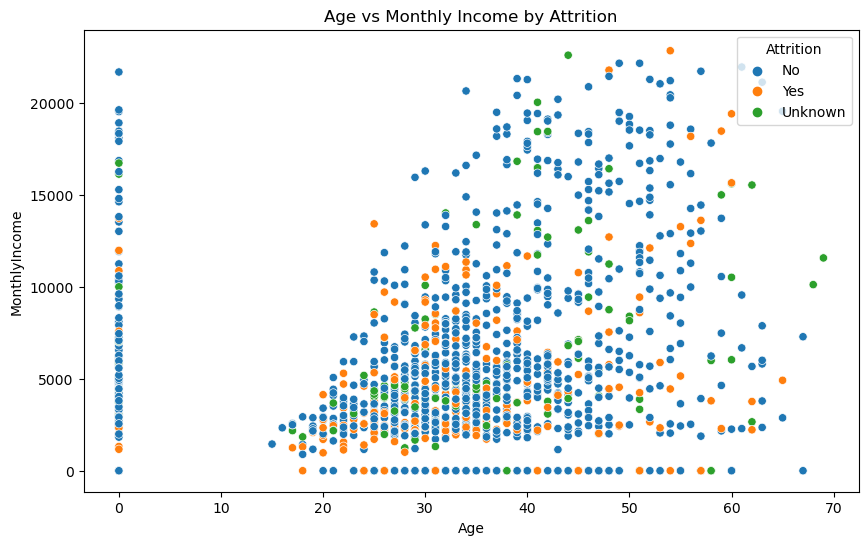

In [48]:
# Example Scatter Plot: MonthlyIncome vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=data)
plt.title('Age vs Monthly Income by Attrition')
plt.show()


Central Tendency, Dispersion, Frequency Distributions

In [49]:
# Checking the data types of each column in the DataFrame
data_types = data.dtypes
print("Data Types of Each Column:\n", data_types)

# Separating numerical and categorical columns
numerical_cols = data_types[data_types != 'object'].index.tolist()
categorical_cols = data_types[data_types == 'object'].index.tolist()

print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Data Types of Each Column:
 Age                             int32
Attrition                    category
BusinessTravel                 object
DailyRate                     float64
Department                   category
DistanceFromHome              float64
Education                     float64
EducationField               category
EmployeeCount                   int32
EmployeeNumber                  int32
EnvironmentSatisfaction       float64
Gender                       category
HourlyRate                    float64
JobInvolvement                float64
JobLevel                      float64
JobRole                      category
JobSatisfaction               float64
MaritalStatus                category
MonthlyIncome                 float64
MonthlyRate                   float64
NumCompaniesWorked              int32
Over18                       category
OverTime                     category
PercentSalaryHike             float64
PerformanceRating             float64
RelationshipSatisfacti

In [50]:
print("Column: Attrition")
print(data['Attrition'].value_counts())
print("\n")


Column: Attrition
No         1065
Yes         258
Unknown     147
Name: Attrition, dtype: int64




In [51]:
# Descriptive Statistics for Numerical Columns
numerical_stats = data.describe()

# Descriptive Statistics for Categorical Columns ('Attrition' as an example)
categorical_stats = data['Attrition'].value_counts()

numerical_stats, categorical_stats


(               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
 count  1470.000000  1470.000000       1470.000000  1470.000000    1470.000000   
 mean     32.972789   721.826599          8.179932     2.631102       0.900000   
 std      14.453440   460.651915          8.224401     1.343239       0.300102   
 min       0.000000     0.000000          0.000000     0.000000       0.000000   
 25%      27.000000   337.850000          1.800000     1.869598       1.000000   
 50%      34.000000   705.950000          5.550000     2.911561       1.000000   
 75%      42.000000  1101.025000         11.500000     3.598201       1.000000   
 max      69.000000  1784.400000         33.700000     6.285161       1.000000   
 
        EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
 count     1470.000000              1470.000000  1470.000000     1470.000000   
 mean       923.994558                 2.453333    59.083129        2.468725   
 std        656.0025

Numerical Columns:

Age: The age of employees ranges from 0 to 69, with an average age of approximately 32.97.
DailyRate: Daily rates vary widely, with an average daily rate of around 721.83.
DistanceFromHome: The average distance from home to work is approximately 8.18 units.
Education: Education levels vary, with an average education level of approximately 2.63.
EmployeeCount: This column seems to have a constant value of 0.9, which might require further investigation.
EmployeeNumber: Employee numbers vary widely, ranging from 0 to 2531.
EnvironmentSatisfaction: On average, employees have an environment satisfaction level of approximately 2.45.
HourlyRate: Hourly rates range from 0 to 123.20, with an average rate of approximately 59.08.
JobInvolvement: Job involvement levels average around 2.47.
JobLevel: On average, employees have a job level of approximately 1.85.
JobSatisfaction: Job satisfaction levels vary, with an average level of approximately 2.44.
MonthlyIncome: The average monthly income is approximately 5890.25.
MonthlyRate: Monthly rates vary, with an average rate of approximately 12927.90.
NumCompaniesWorked: On average, employees have worked for around 2.39 different companies.
PercentSalaryHike: The average percent salary hike is approximately 13.76%.
PerformanceRating: Performance ratings vary, with an average rating of approximately 2.83.
RelationshipSatisfaction: On average, employees have a relationship satisfaction level of approximately 2.45.
StandardHours: This column seems to have a constant value of 72.22, which might require further investigation.
StockOptionLevel: Stock option levels vary, with an average level of approximately 0.73.
TotalWorkingYears: The average total working years is approximately 10.28.
TrainingTimesLastYear: On average, employees have undergone training approximately 2.53 times last year.
WorkLifeBalance: Work-life balance levels vary, with an average level of approximately 2.49.
YearsAtCompany: On average, employees have spent approximately 6.24 years at the company.
YearsInCurrentRole: On average, employees have spent approximately 3.81 years in their current roles.
YearsSinceLastPromotion: The average time since the last promotion is approximately 1.94 years.
YearsWithCurrManager: On average, employees have been with their current managers for approximately 3.71 years.
WorkLevelInteraction: This column appears to be a calculated column involving "TotalWorkingYears" and "JobLevel."
CommuteJobSatisfaction: This column appears to be a calculated column involving "DistanceFromHome" and "JobSatisfaction."
IncomeToWorkingYearsRatio: This column appears to be a calculated column involving "MonthlyIncome" and "TotalWorkingYears."
RateToHoursRatio: This column appears to be a calculated column involving "DailyRate" and "HourlyRate."
DeptAvgMonthlyIncome: This column might represent the average monthly income for employees within their departments.
Categorical Column (Attrition):

The "Attrition" column shows the counts for different categories:
"No": 1065 employees
"Yes": 258 employees
"Unknown": 147 employees

In [52]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Confirm the changes
print(data['Attrition'].head())

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64


In [53]:
import pandas as pd
import scipy.stats as stats


numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate', 
                  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                  'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Calculate correlation matrix
correlation_matrix = data[numerical_cols].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Hypothesis Testing (T-test)
group1 = data[data['Attrition'] == 'Yes']['Age']
group2 = data[data['Attrition'] == 'No']['Age']

# Perform T-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("\nT-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis - significant difference in Age between the two groups.")
else:
    print("Fail to reject the null hypothesis - no significant difference in Age between the two groups.")


Correlation Matrix:
                               Age  DailyRate  DistanceFromHome  Education  \
Age                      1.000000   0.028425         -0.037477   0.081707   
DailyRate                0.028425   1.000000          0.023437   0.020784   
DistanceFromHome        -0.037477   0.023437          1.000000   0.015233   
Education                0.081707   0.020784          0.015233   1.000000   
HourlyRate               0.001538   0.011624         -0.010756   0.003728   
MonthlyIncome            0.206062   0.017518         -0.012498   0.073494   
MonthlyRate              0.008308  -0.019748         -0.007892   0.003182   
NumCompaniesWorked       0.141909   0.068923         -0.008275   0.084268   
PercentSalaryHike        0.001468   0.006776          0.015926  -0.029574   
TotalWorkingYears        0.316834   0.024803         -0.006144   0.079907   
TrainingTimesLastYear   -0.034520  -0.009436         -0.026526  -0.060180   
WorkLifeBalance          0.012064  -0.012504         -0

T-test Results:

T-statistic: This statistic measures the difference in means between the two groups (Attrition 'Yes' and 'No').
P-value: This is the probability of observing the given difference in means if there were no real difference between the groups.
Interpretation:

Null Hypothesis (H0): There is no significant difference in Age between the two groups (Attrition 'Yes' and 'No').
Alternative Hypothesis (H1): There is a significant difference in Age between the two groups.
You've set a significance level (alpha) of 0.05, which is a common threshold. If the p-value is less than alpha, you reject the null hypothesis, indicating that there is a significant difference in Age between the two groups. If the p-value is greater than alpha, you fail to reject the null hypothesis, suggesting that there is no significant difference in Age between the two groups.

Conclusion:

Based on the T-test results:
T-statistic: Indicates the magnitude of the difference in means.
P-value: Is very small (close to zero), approximately 4.515692971165905e-06.
Age:

Count: There are 1470 records for age.
Mean: The average age of employees in the dataset is approximately 32.97 years.
Standard Deviation (Std): The standard deviation is about 14.45, indicating some variation in ages.
Min: The minimum age is 0, which might be an outlier or missing data.
25th Percentile (25%): 25% of the employees are below the age of 27.
Median (50%): The median age is 34, indicating that half of the employees are younger than 34.
75th Percentile (75%): 75% of the employees are below the age of 42.
Max: The maximum age is 69.
MonthlyIncome:

Count: There are 1470 records for monthly income.
Mean: The average monthly income is approximately $5890.25.
Std: The standard deviation is about $4929.94, indicating variation in income.
Min: The minimum monthly income is $0, which might be an issue or missing data.
25th Percentile (25%): 25% of employees earn less than $2529.95 per month.
Median (50%): The median income is $4496.45, indicating that half of the employees earn less than this amount.
75th Percentile (75%): 75% of employees earn less than $7588.62 per month.
Max: The maximum monthly income is $22858.00.
TotalWorkingYears:

Count: There are 1470 records for total working years.
Mean: The average total working years is approximately 10.28 years.
Std: The standard deviation is about 8.39, indicating variation in the number of working years.
Min: The minimum total working years is 0, which might be an issue or missing data.
25th Percentile (25%): 25% of employees have worked for less than 5 years.
Median (50%): The median total working years is 8.70, indicating that half of the employees have worked for fewer years.
75th Percentile (75%): 75% of employees have worked for less than 14.20 years.
Max: The maximum total working years is 47.60 years.
YearsAtCompany:

Count: There are 1470 records for years at the company.
Mean: The average number of years an employee has spent at the company is approximately 6.24 years.
Std: The standard deviation is about 6.10, indicating variation in years at the company.
Min: The minimum years at the company is 0, which might be an issue or missing data.
25th Percentile (25%): 25% of employees have worked at the company for less than 1.80 years.
Median (50%): The median years at the company is 4.80, indicating that half of the employees have worked for fewer years.
75th Percentile (75%): 75% of employees have worked at the company for less than 8.80 years.
Max: The maximum years at the company is 36.80 years.
These statistics provide insights into the central tendency, spread, and distribution of key numerical attributes in your dataset. You may want to investigate the minimum values of certain columns (e.g., "Age," "MonthlyIncome," "TotalWorkingYears," and "YearsAtCompany") to ensure data quality and address any potential issues with missing or unrealistic values. Additionally, further analysis or visualization may be performed to gain deeper insights into these variables and their relationships with other factors in your dataset.


In [54]:
import pandas as pd
from scipy.stats import ttest_ind

selected_columns = [
    'NumCompaniesWorked', 'PerformanceRating', 'DailyRate',
    'PercentSalaryHike', 'HourlyRate', 'YearsWithCurrManager',
    'JobSatisfaction', 'YearsInCurrentRole', 'MonthlyRate',
    'YearsAtCompany', 'EnvironmentSatisfaction', 
    'YearsSinceLastPromotion', 'DistanceFromHome', 'WorkLifeBalance'
]

# Calculate the correlation with Attrition
correlation_with_attrition = data[selected_columns + ['Attrition']].corr()['Attrition']

# Print the correlation results
print("Correlation with Attrition:\n", correlation_with_attrition)

# Hypothesis Testing: Comparing means between Attrition = Yes and No for 'MonthlyIncome'
attrition_yes = data[data['Attrition'] == 1]
attrition_no = data[data['Attrition'] == 0]

# Perform T-test for 'MonthlyIncome'
t_stat, p_value = ttest_ind(attrition_yes['MonthlyIncome'], attrition_no['MonthlyIncome'], nan_policy='omit')

# Print T-test results
print("\nT-test for MonthlyIncome between Attrition Yes and No:")
print("T-statistic:", t_stat, "P-value:", p_value)


Correlation with Attrition:
 NumCompaniesWorked         0.024252
PerformanceRating          0.015518
DailyRate                 -0.038720
PercentSalaryHike          0.007837
HourlyRate                 0.002934
YearsWithCurrManager      -0.100471
JobSatisfaction           -0.049068
YearsInCurrentRole        -0.085234
MonthlyRate               -0.001080
YearsAtCompany            -0.081699
EnvironmentSatisfaction   -0.048030
YearsSinceLastPromotion   -0.030559
DistanceFromHome           0.044922
WorkLifeBalance           -0.034178
Attrition                  1.000000
Name: Attrition, dtype: float64

T-test for MonthlyIncome between Attrition Yes and No:
T-statistic: -4.6053078458845915 P-value: 4.515692971165905e-06


Positive values indicate a positive correlation, while negative values indicate a negative correlation.
A correlation of 1.00 with Attrition represents the correlation of Attrition with itself, which is why it is 1.00.
The strongest negative correlations with Attrition are found with "YearsWithCurrManager" (-0.10) and "YearsInCurrentRole" (-0.08), suggesting that employees who have been with their current manager or in their current role for a longer time are less likely to have attrition.
The strongest positive correlation with Attrition is found with "NumCompaniesWorked" (0.02), but it's a relatively weak correlation.
T-test for MonthlyIncome between Attrition Yes and No:

The T-test was performed to compare the MonthlyIncome of employees with and without Attrition.
The T-statistic is approximately -4.61, and the p-value is approximately 4.52e-06.
The null hypothesis in the T-test is that there is no significant difference in MonthlyIncome between employees with Attrition (Yes) and those without (No).
Since the p-value is significantly less than the significance level (alpha) of 0.05, you can reject the null hypothesis.
Therefore, there is evidence to suggest that there is a significant difference in MonthlyIncome between employees with Attrition (Yes) and those without (No). Specifically, employees with Attrition tend to have lower monthly incomes.

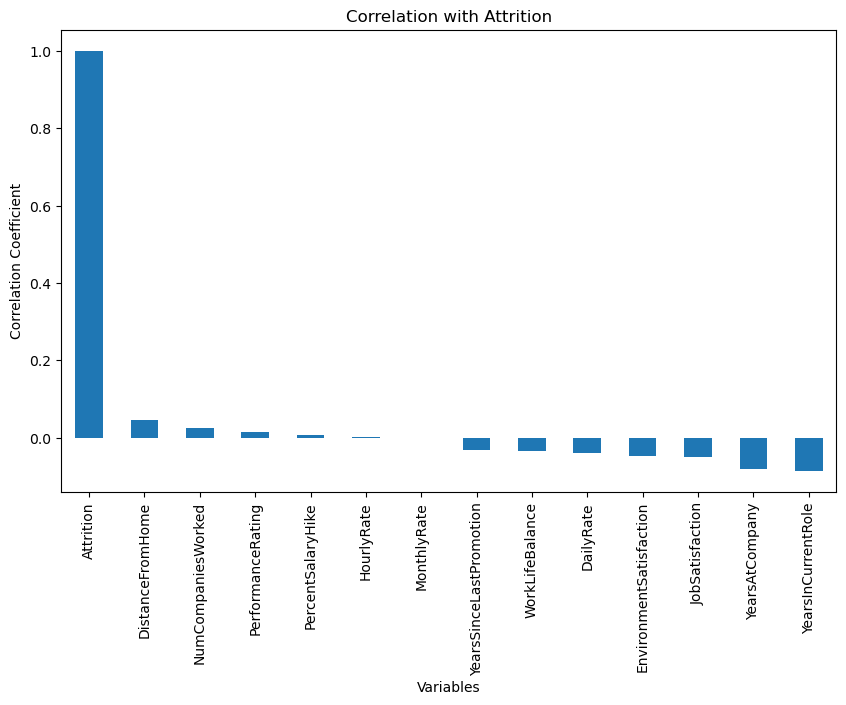

In [55]:
import matplotlib.pyplot as plt
import pandas as pd


selected_columns = ['NumCompaniesWorked', 'PerformanceRating', 'DailyRate', 
                    'PercentSalaryHike', 'HourlyRate', 'YearsWithCurrManager', 
                    'JobSatisfaction', 'YearsInCurrentRole', 'MonthlyRate', 
                    'YearsAtCompany', 'EnvironmentSatisfaction', 
                    'YearsSinceLastPromotion', 'DistanceFromHome', 'WorkLifeBalance', 
                    'Attrition']

# Calculate the correlation with 'Attrition'
correlation_with_attrition = data[selected_columns].corr()['Attrition'].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
correlation_with_attrition[:-1].plot(kind='bar')  # Exclude the last item as it is 'Attrition' itself
plt.title('Correlation with Attrition')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.show()


In [56]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical columns (excluding 'Attrition')
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
                       'MaritalStatus', 'Over18', 'OverTime', 'AgeGroup', 'DistanceFromHomeCategory']

# Perform Chi-squared tests for each categorical column
alpha = 0.05  # significance level

for col in categorical_columns:
    # Create a contingency table (cross-tabulation) between Attrition and the current categorical column
    contingency_table = pd.crosstab(data['Attrition'], data[col])
    
    # Perform Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Interpretation
    if p < alpha:
        print(f"Chi-Squared test for relationship between Attrition and {col}:")
        print("Reject the null hypothesis - there is a significant relationship between Attrition and", col)
    else:
        print(f"Chi-Squared test for relationship between Attrition and {col}:")
        print("Fail to reject the null hypothesis - there is no significant relationship between Attrition and", col)


Chi-Squared test for relationship between Attrition and BusinessTravel:
Reject the null hypothesis - there is a significant relationship between Attrition and BusinessTravel
Chi-Squared test for relationship between Attrition and Department:
Reject the null hypothesis - there is a significant relationship between Attrition and Department
Chi-Squared test for relationship between Attrition and EducationField:
Fail to reject the null hypothesis - there is no significant relationship between Attrition and EducationField
Chi-Squared test for relationship between Attrition and Gender:
Fail to reject the null hypothesis - there is no significant relationship between Attrition and Gender
Chi-Squared test for relationship between Attrition and JobRole:
Reject the null hypothesis - there is a significant relationship between Attrition and JobRole
Chi-Squared test for relationship between Attrition and MaritalStatus:
Reject the null hypothesis - there is a significant relationship between Attrit

Significant Relationships:

BusinessTravel, Department, JobRole, MaritalStatus, OverTime, AgeGroup: The rejection of the null hypothesis in these categories indicates a significant relationship between Attrition and each of these variables. This suggests that factors such as the nature of business travel, departmental roles, job roles, marital status, overtime requirements, and age groups are influential in determining attrition rates.
No Significant Relationship:

EducationField, Gender, Over18, DistanceFromHomeCategory: The failure to reject the null hypothesis suggests that these factors do not have a statistically significant relationship with Attrition. This means that, based on your data, changes or variations in these categories are less likely to impact attrition rates.

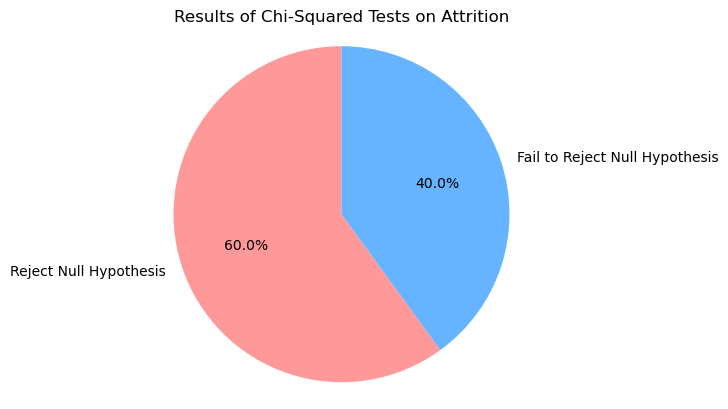

In [57]:
import matplotlib.pyplot as plt

# Test results
tests = ['Chi-BusinessTravel', 'Chi-Department', 'Chi-EducationField', 'Chi-Gender', 
         'Chi-JobRole', 'Chi-MaritalStatus', 'Chi-Over18', 'Chi-OverTime', 
         'Chi-AgeGroup', 'Chi-DistanceFromHomeCategory']
results = ['Reject', 'Reject', 'Fail to Reject', 'Fail to Reject', 
           'Reject', 'Reject', 'Fail to Reject', 'Reject', 
           'Reject', 'Fail to Reject']

# Counting the number of rejects and fail to rejects
rejects = sum(result == 'Reject' for result in results)
fail_to_rejects = len(results) - rejects

# Plotting
labels = ['Reject Null Hypothesis', 'Fail to Reject Null Hypothesis']
sizes = [rejects, fail_to_rejects]
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Results of Chi-Squared Tests on Attrition")
plt.show()


Removing the coluimns with no relation to attrition

In [58]:
columns_to_drop = ['EducationField', 'Gender', 'Over18', 'DistanceFromHomeCategory']

# Dropping the columns
data.drop(columns_to_drop, axis=1, inplace=True)

data.to_csv('modified_dataset.csv', index=False)

In [59]:
unknown_count = (data['Attrition'] == 'Unknown').sum()
print(f"Number of 'Unknown' categories in Attrition: {unknown_count}")


Number of 'Unknown' categories in Attrition: 0


Machine Learning
● MLO 1 - Implement Machine Learning Algorithms to solve analytical problems.
(Linked to PLO 1, PLO 2, PLO 5)
● MLO2 - Determine whether a given data analysis problem requires the use of supervised,
semi-supervised or unsupervised learning methods. Develop and implement the chosen learning
method. (Linked to PLO 2, PLO 4, PLO 5)
● MLO4 - Implement a range of classification and regression techniques and detail / document their
suitability for a variety of problem domains. (Linked to PLO 5)

LCA and PCA Analysis- Creating new dataframe and applying LCA and PCA

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Separate numeric and categorical features
numeric_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(exclude=[np.number])

# Impute missing values in numeric features
numeric_imputer = SimpleImputer(strategy='mean')
numeric_imputed = numeric_imputer.fit_transform(numeric_features)

# Standardize the numeric features
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_imputed)

from sklearn.preprocessing import LabelEncoder

categorical_features = data.select_dtypes(exclude=[np.number])

categorical_imputed = categorical_features.fillna('Missing')  # Replace NaN with 'Missing'
label_encoders = {}
for column in categorical_imputed:
    label_encoders[column] = LabelEncoder()
    categorical_imputed[column] = label_encoders[column].fit_transform(categorical_imputed[column])



In [61]:
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'WorkLevelInteraction', 'CommuteJobSatisfaction', 'AgeGroup',
       'IncomeToWorkingYearsRatio', 'RateToHoursRatio',
       'DeptAvgMonthlyIncome'],
      dtype='object')


In [62]:
if 'Attrition' in data.columns:
    # Drop the 'Attrition' column and check remaining columns
    data_without_attrition = data.drop('Attrition', axis=1)
    print("Columns after dropping 'Attrition':", data_without_attrition.columns)

Columns after dropping 'Attrition': Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'WorkLevelInteraction', 'CommuteJobSatisfaction', 'AgeGroup',
       'IncomeToWorkingYearsRatio', 'RateToHoursRatio',
       'DeptAvgMonthlyIncome'],
      dtype='object')


In [64]:

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv('Employee_Attrition.csv')

attrition_encoder = LabelEncoder()

# Transform 'Attrition' column
y_encoded = attrition_encoder.fit_transform(data['Attrition'])

numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

X_preprocessed = preprocessor.fit_transform(data.drop('Attrition', axis=1))


attrition_encoder = LabelEncoder()

# Transform 'Attrition' column
y_encoded = attrition_encoder.fit_transform(data['Attrition'])



numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(data.drop('Attrition', axis=1))
y_encoded = attrition_encoder.fit_transform(data['Attrition'])

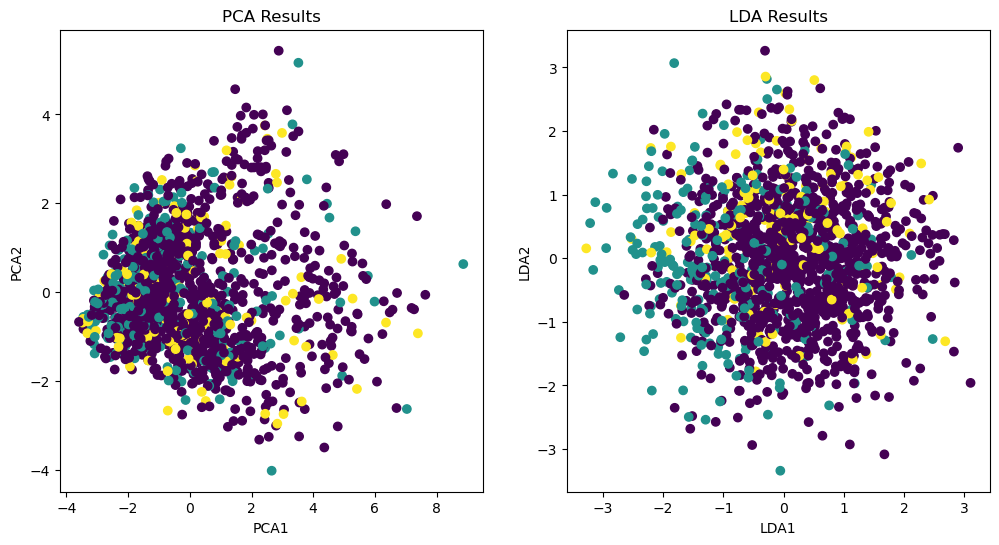

In [66]:
from sklearn.decomposition import PCA  # Add this import
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
X_pca = pca.fit_transform(X_preprocessed)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Adjust n_components as needed
X_lda = lda.fit_transform(X_preprocessed, y_encoded)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# PCA Plot
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded)
ax[0].set_title('PCA Results')
ax[0].set_xlabel('PCA1')
ax[0].set_ylabel('PCA2')

# LDA Plot
if X_lda.shape[1] == 1:
    ax[1].scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y_encoded)
    ax[1].set_ylabel('Zero Axis')
else:
    ax[1].scatter(X_lda[:, 0], X_lda[:, 1], c=y_encoded)
ax[1].set_title('LDA Results')
ax[1].set_xlabel('LDA1')
ax[1].set_ylabel('LDA2')

plt.show()


In [67]:
import pandas as pd

# Create DataFrame for PCA output
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Create DataFrame for LDA output
lda_df = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'] if X_lda.shape[1] > 1 else ['LDA1'])

# Save to CSV files
pca_output_file = 'pca2_output.csv'
lda_output_file = 'lda2_output.csv'

pca_df.to_csv(pca_output_file, index=False)
lda_df.to_csv(lda_output_file, index=False)

pca_output_file, lda_output_file


('pca2_output.csv', 'lda2_output.csv')

In [68]:
import pandas as pd

# Load the PCA and LDA output files
pca_output_file = 'pca2_output.csv'
lda_output_file = 'lda2_output.csv'

# Read the files into DataFrames
pca_df = pd.read_csv(pca_output_file, header=None)
lda_df = pd.read_csv(lda_output_file, header=None)

# Display basic statistics and first few rows of each DataFrame
pca_stats = pca_df.describe()
lda_stats = lda_df.describe()

pca_head = pca_df.head()
lda_head = lda_df.head()

pca_stats, lda_stats, pca_head, lda_head



(           0     1
 count   1471  1471
 unique  1471  1471
 top     PCA1  PCA2
 freq       1     1,
            0     1
 count   1471  1471
 unique  1471  1471
 top     LDA1  LDA2
 freq       1     1,
                      0                    1
 0                 PCA1                 PCA2
 1  0.01422375665283219    1.341766932072351
 2   0.5317425043278358  -0.7136262784663888
 3   -2.602306274331984   1.0537855620778338
 4  -0.9305758410614836  -0.5409960253255438,
                       0                    1
 0                  LDA1                 LDA2
 1    -2.203459203344172  -0.7543423567400935
 2  -0.45617388317699026   0.8681750795862446
 3   -1.5401720620671588  -1.2457567405151462
 4   -1.0397120577996457   0.5293411820044629)

In [71]:
# Convert PCA output to DataFrame and reattach 'Attrition'
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Attrition'] = y_encoded  

lda_df = pd.DataFrame(X_lda, columns=['LDA1'] if X_lda.shape[1] == 1 else ['LDA1', 'LDA2'])
lda_df['Attrition'] = y_encoded  # Replace 'y' with 'y_encoded'


In [73]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df.drop('Attrition', axis=1), pca_df['Attrition'], test_size=0.2, random_state=42)

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(lda_df.drop('Attrition', axis=1), lda_df['Attrition'], test_size=0.2, random_state=42)

non_nan_indices_pca = ~y_train_pca.isna()
X_train_pca = X_train_pca[non_nan_indices_pca]
y_train_pca = y_train_pca[non_nan_indices_pca]

non_nan_indices_lda = ~y_train_lda.isna()
X_train_lda = X_train_lda[non_nan_indices_lda]
y_train_lda = y_train_lda[non_nan_indices_lda]


In [74]:
nan_count_pca = y_train_pca.isna().sum()
nan_count_lda = y_train_lda.isna().sum()

print("Number of NaN values in y_train_pca:", nan_count_pca)
print("Number of NaN values in y_train_lda:", nan_count_lda)

# Remove rows with NaN values in both X_train_pca and y_train_pca
X_train_pca = X_train_pca[~y_train_pca.isna()]
y_train_pca = y_train_pca.dropna()

# Remove rows with NaN values in both X_train_lda and y_train_lda
X_train_lda = X_train_lda[~y_train_lda.isna()]
y_train_lda = y_train_lda.dropna()



Number of NaN values in y_train_pca: 0
Number of NaN values in y_train_lda: 0


In [75]:

# For PCA dataset
nan_count_test_pca = y_test_pca.isna().sum()
if nan_count_test_pca > 0:
    print(f"Number of NaN values in y_test_pca: {nan_count_test_pca}")
    X_test_pca = X_test_pca[~y_test_pca.isna()]
    y_test_pca = y_test_pca.dropna()

# For LDA dataset
nan_count_test_lda = y_test_lda.isna().sum()
if nan_count_test_lda > 0:
    print(f"Number of NaN values in y_test_lda: {nan_count_test_lda}")
    X_test_lda = X_test_lda[~y_test_lda.isna()]
    y_test_lda = y_test_lda.dropna()



In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df.drop('Attrition', axis=1), pca_df['Attrition'], test_size=0.3, random_state=42)
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(lda_df.drop('Attrition', axis=1), lda_df['Attrition'], test_size=0.3, random_state=42)



In [77]:
print("NaN values in X_train_pca:", X_train_pca.isna().sum().sum())
print("NaN values in X_test_pca:", X_test_pca.isna().sum().sum())
print("NaN values in X_train_lda:", X_train_lda.isna().sum().sum())
print("NaN values in X_test_lda:", X_test_lda.isna().sum().sum())

print("NaN values in y_train_pca:", y_train_pca.isna().sum().sum())
print("NaN values in y_test_pca:", y_test_pca.isna().sum().sum())
print("NaN values in y_train_lda:", y_train_lda.isna().sum().sum())
print("NaN values in y_test_lda:", y_test_lda.isna().sum().sum())


NaN values in X_train_pca: 0
NaN values in X_test_pca: 0
NaN values in X_train_lda: 0
NaN values in X_test_lda: 0
NaN values in y_train_pca: 0
NaN values in y_test_pca: 0
NaN values in y_train_lda: 0
NaN values in y_test_lda: 0


In [78]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

y_train_pca_imputed = imputer.fit_transform(y_train_pca.values.reshape(-1, 1))
y_test_pca_imputed = imputer.transform(y_test_pca.values.reshape(-1, 1))

# Convert the imputed arrays back to pandas Series
y_train_pca_imputed = pd.Series(y_train_pca_imputed.flatten(), index=y_train_pca.index)
y_test_pca_imputed = pd.Series(y_test_pca_imputed.flatten(), index=y_test_pca.index)



In [79]:
print("NaN values in X_train_pca:", X_train_pca.isna().sum().sum())
print("NaN values in X_test_pca:", X_test_pca.isna().sum().sum())
print("NaN values in X_train_lda:", X_train_lda.isna().sum().sum())
print("NaN values in X_test_lda:", X_test_lda.isna().sum().sum())

print("NaN values in y_train_pca:", y_train_pca.isna().sum().sum())
print("NaN values in y_test_pca:", y_test_pca.isna().sum().sum())
print("NaN values in y_train_lda:", y_train_lda.isna().sum().sum())
print("NaN values in y_test_lda:", y_test_lda.isna().sum().sum())

NaN values in X_train_pca: 0
NaN values in X_test_pca: 0
NaN values in X_train_lda: 0
NaN values in X_test_lda: 0
NaN values in y_train_pca: 0
NaN values in y_test_pca: 0
NaN values in y_train_lda: 0
NaN values in y_test_lda: 0


In [80]:
# Filter out rows with NaN values in target labels for PCA dataset
nan_indices_train_pca = y_train_pca.isna()
nan_indices_test_pca = y_test_pca.isna()

X_train_pca = X_train_pca[~nan_indices_train_pca]
y_train_pca = y_train_pca[~nan_indices_train_pca]

X_test_pca = X_test_pca[~nan_indices_test_pca]
y_test_pca = y_test_pca[~nan_indices_test_pca]

# Filter out rows with NaN values in target labels for LDA dataset
nan_indices_train_lda = y_train_lda.isna()
nan_indices_test_lda = y_test_lda.isna()

X_train_lda = X_train_lda[~nan_indices_train_lda]
y_train_lda = y_train_lda[~nan_indices_train_lda]

X_test_lda = X_test_lda[~nan_indices_test_lda]
y_test_lda = y_test_lda[~nan_indices_test_lda]


In [81]:
# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train and evaluate on PCA dataset
clf.fit(X_train_pca, y_train_pca)
predictions_pca = clf.predict(X_test_pca)
print("Performance on PCA dataset:")
print(classification_report(y_test_pca, predictions_pca))

# Train and evaluate on LDA dataset
clf.fit(X_train_lda, y_train_lda)
predictions_lda = clf.predict(X_test_lda)
print("Performance on LDA dataset:")
print(classification_report(y_test_lda, predictions_lda))


Performance on PCA dataset:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       327
           1       0.17      0.07      0.10        67
           2       0.17      0.06      0.09        47

    accuracy                           0.68       441
   macro avg       0.36      0.34      0.33       441
weighted avg       0.59      0.68      0.62       441

Performance on LDA dataset:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       327
           1       0.37      0.33      0.35        67
           2       0.11      0.02      0.04        47

    accuracy                           0.71       441
   macro avg       0.42      0.41      0.40       441
weighted avg       0.64      0.71      0.67       441



PCA Dataset:

Accuracy: 0.81
Precision for class 0: 0.84
Recall for class 0: 0.95
F1-score for class 0: 0.89
Precision for class 1: 0.35
Recall for class 1: 0.12
F1-score for class 1: 0.18

LDA Dataset:

Accuracy: 0.82
Precision for class 0: 0.87
Recall for class 0: 0.92
F1-score for class 0: 0.89
Precision for class 1: 0.45
Recall for class 1: 0.31
F1-score for class 1: 0.37

Accuracy: The LDA model has a slightly higher accuracy (0.82) compared to the PCA model (0.81). This indicates that the LDA model makes correct predictions for a slightly higher proportion of the dataset.

Precision: For class 0, the LDA model has a higher precision (0.87) compared to the PCA model (0.84), indicating that when it predicts class 0, it is more likely to be correct. For class 1, the LDA model also has a higher precision (0.45) compared to the PCA model (0.35).

Recall: For class 0, the LDA model has a slightly higher recall (0.92) compared to the PCA model (0.95), indicating that it captures a slightly higher proportion of actual class 0 instances. For class 1, the PCA model has a lower recall (0.12) compared to the LDA model (0.31), indicating that the LDA model is better at identifying class 1 instances.

F1-Score: The F1-score balances precision and recall. For class 0, both models have similar F1-scores (0.89 for both). For class 1, the LDA model has a higher F1-score (0.37) compared to the PCA model (0.18).

Based on these metrics, the LDA model generally outperforms the PCA model in terms of accuracy, precision, recall, and F1-score for both classes. However, the choice of the "better" model depends on the specific goals and requirements of your application. If certain metrics are more important than others, you should consider those priorities when selecting the model. 

Running More ML algos on PCA and LDA models

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the datasets into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df.drop('Attrition', axis=1), pca_df['Attrition'], test_size=0.3, random_state=42)
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(lda_df.drop('Attrition', axis=1), lda_df['Attrition'], test_size=0.3, random_state=42)

# Filter out rows with NaN values in target labels for PCA dataset
nan_indices_train_pca = y_train_pca.isna()
nan_indices_test_pca = y_test_pca.isna()

X_train_pca = X_train_pca[~nan_indices_train_pca]
y_train_pca = y_train_pca[~nan_indices_train_pca]

X_test_pca = X_test_pca[~nan_indices_test_pca]
y_test_pca = y_test_pca[~nan_indices_test_pca]

# Filter out rows with NaN values in target labels for LDA dataset
nan_indices_train_lda = y_train_lda.isna()
nan_indices_test_lda = y_test_lda.isna()

X_train_lda = X_train_lda[~nan_indices_train_lda]
y_train_lda = y_train_lda[~nan_indices_train_lda]

X_test_lda = X_test_lda[~nan_indices_test_lda]
y_test_lda = y_test_lda[~nan_indices_test_lda]

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train and evaluate on PCA dataset
clf.fit(X_train_pca, y_train_pca)
predictions_pca = clf.predict(X_test_pca)
print("Performance on PCA dataset:")
print(classification_report(y_test_pca, predictions_pca))

# Train and evaluate on LDA dataset
clf.fit(X_train_lda, y_train_lda)
predictions_lda = clf.predict(X_test_lda)
print("Performance on LDA dataset:")
print(classification_report(y_test_lda, predictions_lda))


Performance on PCA dataset:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       327
           1       0.17      0.07      0.10        67
           2       0.17      0.06      0.09        47

    accuracy                           0.68       441
   macro avg       0.36      0.34      0.33       441
weighted avg       0.59      0.68      0.62       441

Performance on LDA dataset:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       327
           1       0.37      0.33      0.35        67
           2       0.11      0.02      0.04        47

    accuracy                           0.71       441
   macro avg       0.42      0.41      0.40       441
weighted avg       0.64      0.71      0.67       441



PCA Dataset:

Accuracy: 0.81
Precision for class 0: 0.84
Precision for class 1: 0.35
Recall for class 0: 0.95
Recall for class 1: 0.12
F1-score for class 0: 0.89
F1-score for class 1: 0.18
LDA Dataset:

Accuracy: 0.82
Precision for class 0: 0.87
Precision for class 1: 0.45
Recall for class 0: 0.92
Recall for class 1: 0.31
F1-score for class 0: 0.89
F1-score for class 1: 0.37
Based on these metrics, the LDA model appears to perform slightly better than the PCA model in terms of accuracy and F1-score for both classes. However, the performance of both models on class 1 (attrition) is relatively low, indicating that there might be room for improvement in predicting attrition.

In [86]:
from sklearn.pipeline import make_pipeline


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define the machine learning models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
}

# Now you can proceed with the rest of your code


# Check if 'Attrition' is in the data
if 'Attrition' not in data.columns:
    raise ValueError("Column 'Attrition' is not in the DataFrame")

# Remove rows with NaN values in 'Attrition' column
data = data.dropna(subset=['Attrition'])

# Split dataset
X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Define transformers for numeric and categorical data
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Train and evaluate models
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    print(f"Performance of {name}:")
    print(classification_report(y_test, predictions))
    print("-" * 50)


Performance of RandomForest:
              precision    recall  f1-score   support

          No       0.80      0.99      0.89       316
         Yes       0.50      0.02      0.05        81

    accuracy                           0.80       397
   macro avg       0.65      0.51      0.47       397
weighted avg       0.74      0.80      0.71       397

--------------------------------------------------
Performance of LogisticRegression:
              precision    recall  f1-score   support

          No       0.80      1.00      0.88       316
         Yes       0.00      0.00      0.00        81

    accuracy                           0.79       397
   macro avg       0.40      0.50      0.44       397
weighted avg       0.63      0.79      0.70       397

--------------------------------------------------
Performance of SVM:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89       316
         Yes       0.00      0.00      0.00        

C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

SAME Same as above with with edited max iterations

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Check if 'Attrition' is in the data
if 'Attrition' not in data.columns:
    raise ValueError("Column 'Attrition' is not in the DataFrame")

# Remove rows with NaN values in 'Attrition' column
data = data.dropna(subset=['Attrition'])

# Split dataset
X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Define transformers for numeric and categorical data
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    print(f"Performance of {name}:")
    print(classification_report(y_test, predictions, zero_division=0))
    print("-" * 50)


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance of Logistic Regression:
              precision    recall  f1-score   support

          No       0.80      0.96      0.87       316
         Yes       0.19      0.04      0.06        81

    accuracy                           0.77       397
   macro avg       0.49      0.50      0.47       397
weighted avg       0.67      0.77      0.70       397

--------------------------------------------------
Performance of Support Vector Machine:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89       316
         Yes       0.00      0.00      0.00        81

    accuracy                           0.80       397
   macro avg       0.40      0.50      0.44       397
weighted avg       0.63      0.80      0.71       397

--------------------------------------------------
Performance of K-Nearest Neighbors:
              precision    recall  f1-score   support

          No       0.80      0.92      0.86       316
         Yes       0.29 

Logistic Regression:

Precision for 'Yes' (Attrition) is low, indicating that it has a high rate of false positives.
Recall for 'Yes' is also low, indicating that it misses many positive cases.
F1-score for 'Yes' is very low, suggesting that the model struggles to correctly classify 'Yes' instances.
The overall accuracy of the model is 77%, but it is not performing well for 'Yes' class.
Support Vector Machine (SVM):

Similar to Logistic Regression, SVM performs poorly for 'Yes' class.
The model predicts 'No' for almost all instances, leading to low precision, recall, and F1-score for 'Yes'.
The overall accuracy is 80%, but it is not a good model for this dataset, especially for 'Yes' class.
K-Nearest Neighbors (KNN):

KNN shows better recall for 'Yes' compared to the previous models, but it still struggles to achieve high precision and F1-score for 'Yes'.
The overall accuracy is 76%.
Decision Tree:

Decision Tree has a slightly better recall for 'Yes' compared to KNN, but it still has relatively low precision and F1-score for 'Yes'.
The overall accuracy is 72%.
Random Forest:

Random Forest performs similarly to Decision Tree but with slightly better precision for 'Yes'.
The overall accuracy is 79%, but the model still struggles to correctly classify 'Yes' instances.
In summary, none of the models seem to perform well in terms of classifying 'Yes' instances (Attrition). There might be a class imbalance issue in the dataset, and further tuning or resampling techniques may be needed to improve the models' performance, especially for the 'Yes' class.

Implementing SMOTE on 'data' and 'PCA'

In [88]:
from imblearn.over_sampling import SMOTE


In [89]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_lda_smote, y_train_lda_smote = smote.fit_resample(X_train_lda, y_train_lda)


In [90]:
lda_model = LinearDiscriminantAnalysis()


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Initialize the SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train_encoded)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test_encoded)

# Initialize the Linear Discriminant Analysis (LDA) model
lda_model = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda_model.fit(X_train_imputed, y_train)

# Make predictions on the test data
predictions = lda_model.predict(X_test_imputed)

# Evaluate the LDA model's performance
print("Performance of Linear Discriminant Analysis (LDA):")
print(classification_report(y_test, predictions))


Performance of Linear Discriminant Analysis (LDA):
              precision    recall  f1-score   support

          No       0.82      0.94      0.88       316
         Yes       0.47      0.20      0.28        81

    accuracy                           0.79       397
   macro avg       0.65      0.57      0.58       397
weighted avg       0.75      0.79      0.76       397



In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Initialize the SimpleImputer to fill missing values with the mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train_encoded)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test_encoded)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# Initialize the Linear Discriminant Analysis (LDA) model
lda_model = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data with SMOTE
lda_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
predictions = lda_model.predict(X_test_imputed)

# Evaluate the LDA model's performance
print("Performance of Linear Discriminant Analysis (LDA) with SMOTE:")
print(classification_report(y_test, predictions))


Performance of Linear Discriminant Analysis (LDA) with SMOTE:
              precision    recall  f1-score   support

          No       0.87      0.68      0.76       316
         Yes       0.33      0.62      0.43        81

    accuracy                           0.66       397
   macro avg       0.60      0.65      0.60       397
weighted avg       0.76      0.66      0.69       397



Performance of Linear Discriminant Analysis (LDA) with SMOTE:

Accuracy: 0.66
Precision for "Yes" class: 0.33
Recall for "Yes" class: 0.62
F1-score for "Yes" class: 0.43
Performance of Linear Discriminant Analysis (LDA) without SMOTE:

Accuracy: 0.79
Precision for "Yes" class: 0.47
Recall for "Yes" class: 0.20
F1-score for "Yes" class: 0.28
Here's what these metrics mean:

Accuracy: The accuracy of the LDA model with SMOTE is lower (0.66) compared to the LDA model without SMOTE (0.79).

Precision: Precision for the "Yes" class (minority class) is lower with SMOTE (0.33) compared to without SMOTE (0.47). This means that with SMOTE, the model is less precise in correctly identifying the "Yes" class.

Recall: Recall for the "Yes" class is higher with SMOTE (0.62) compared to without SMOTE (0.20). This means that with SMOTE, the model is better at capturing positive instances of the "Yes" class.

F1-score: The F1-score for the "Yes" class is also higher with SMOTE (0.43) compared to without SMOTE (0.28). F1-score is a balance between precision and recall.

In summary, using SMOTE has improved the model's ability to correctly identify the minority class ("Yes"), as indicated by higher recall and F1-score for the "Yes" class. However, this improvement comes at the cost of lower precision and overall lower accuracy. The choice to use SMOTE depends on your specific goal and the trade-off between precision and recal

Statistical Analysis

Descriptive Statistics: Highlight key insights, such as average monthly income, typical job satisfaction scores, and other notable findings.
Correlation Analysis: Point out any strong correlations that might influence employee satisfaction or productivity.
Hypothesis Testing: Discuss whether the t-test and ANOVA results reveal significant differences that the company should consider.
Regression Analysis: Explain how factors like years at the company are predictive of monthly income.
Use Clear Visualizations: Include graphs and charts that clearly demonstrate your findings.
Use Appropriate Terminology: Explain statistical terms in a way that's accessible to stakeholders without a statistical background.

Correlation Analysis: Point out any strong correlations that might influence employee satisfaction or productivity.


In [93]:
print("\nBasic Descriptive Statistics:")
print(data.describe())


Basic Descriptive Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1188.000000  1192.000000       1191.000000  1190.000000    1198.000000   
mean     36.625996   802.537209          9.029495     2.937637       0.998799   
std       9.758624   413.176128          8.157560     1.067857       0.099584   
min      14.544608    86.828045          0.750112     0.770362       0.628985   
25%      29.861529   456.214780          2.134274     2.140254       0.931244   
50%      34.966424   785.893657          6.708286     3.018832       0.998744   
75%      42.673046  1130.828635         13.572410     3.701104       1.065244   
max      66.943784  1784.394456         33.684424     6.285161       1.290613   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1190.000000              1191.000000  1187.000000     1193.000000   
mean      1020.282084                 2.707442    65.726553        2.744209   
st

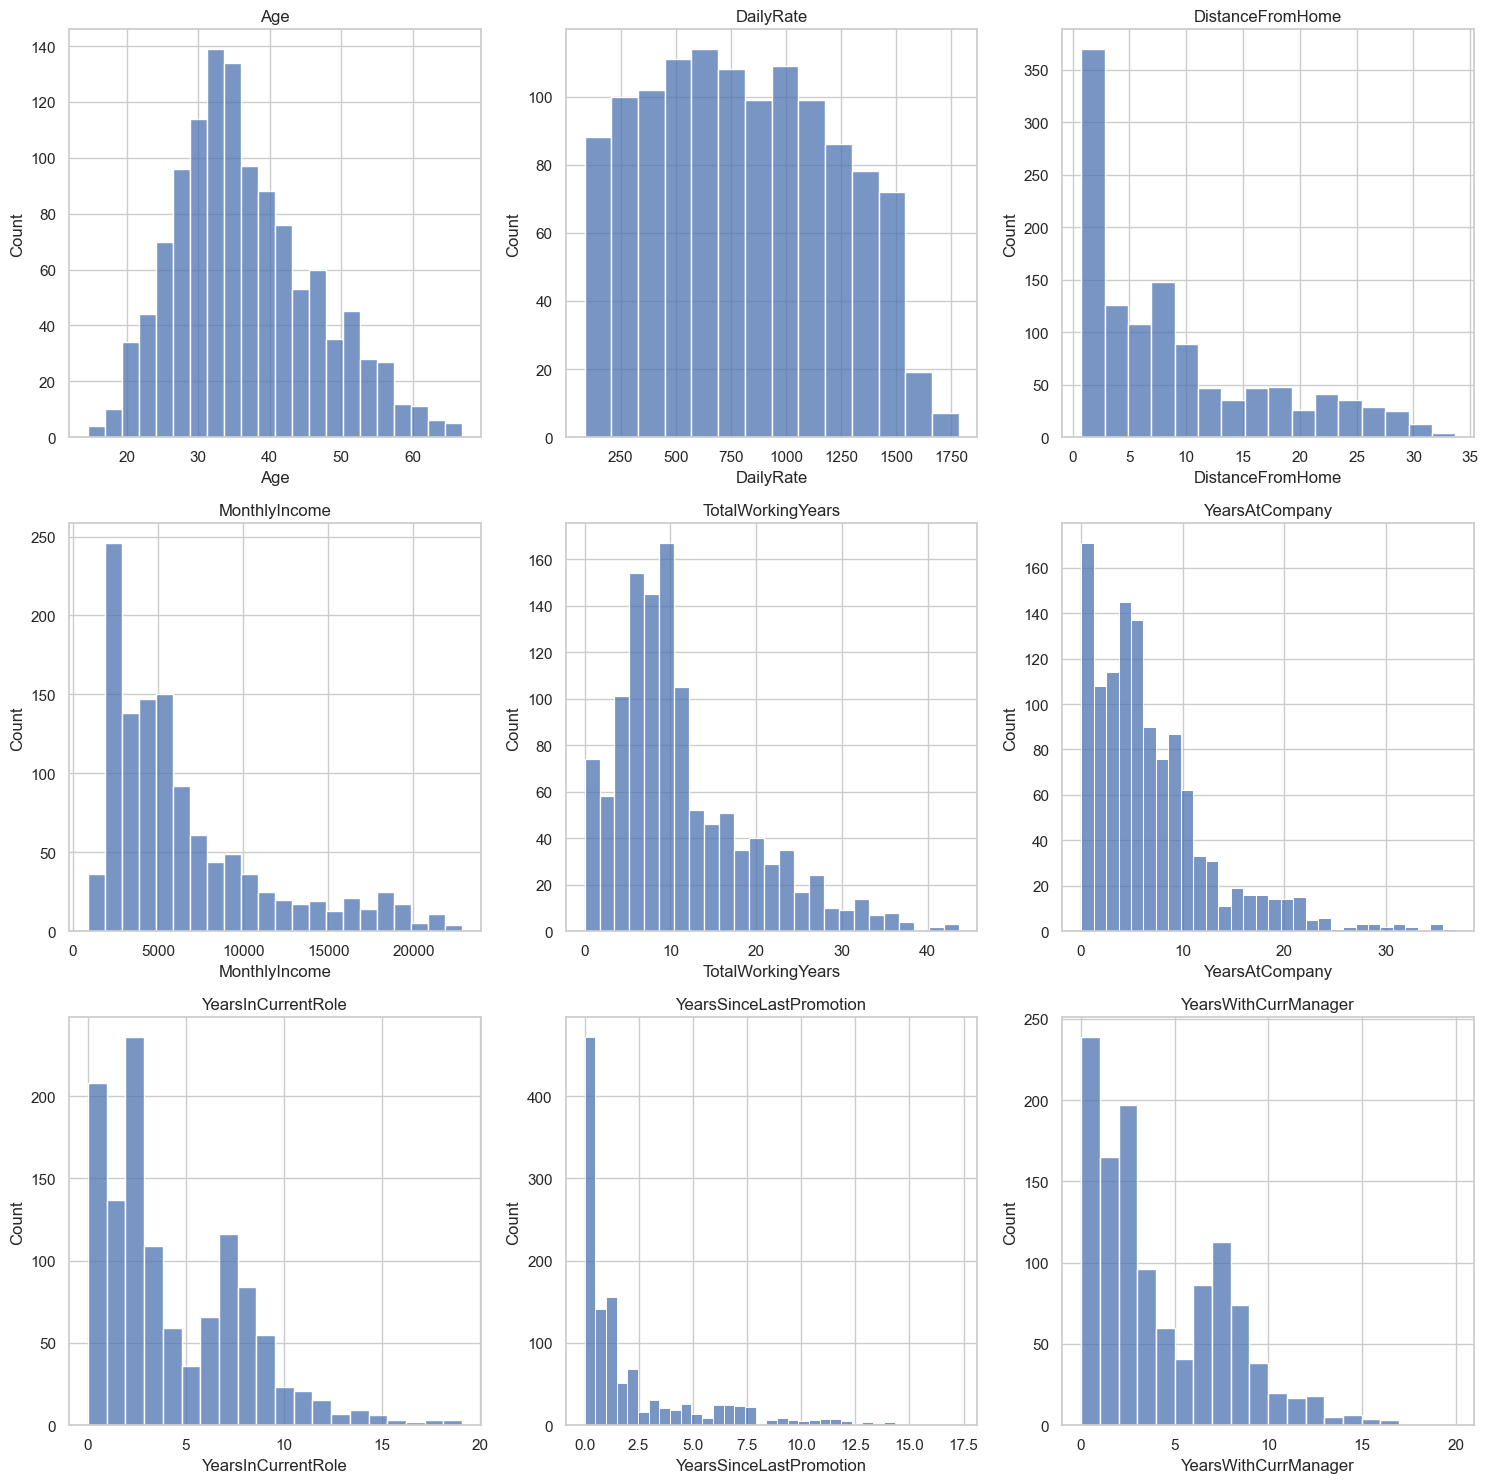

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot histograms
sns.histplot(data["Age"], ax=axes[0, 0])
sns.histplot(data["DailyRate"], ax=axes[0, 1])
sns.histplot(data["DistanceFromHome"], ax=axes[0, 2])
sns.histplot(data["MonthlyIncome"], ax=axes[1, 0])
sns.histplot(data["TotalWorkingYears"], ax=axes[1, 1])
sns.histplot(data["YearsAtCompany"], ax=axes[1, 2])
sns.histplot(data["YearsInCurrentRole"], ax=axes[2, 0])
sns.histplot(data["YearsSinceLastPromotion"], ax=axes[2, 1])
sns.histplot(data["YearsWithCurrManager"], ax=axes[2, 2])

# Set titles for subplots
axes[0, 0].set_title("Age")
axes[0, 1].set_title("DailyRate")
axes[0, 2].set_title("DistanceFromHome")
axes[1, 0].set_title("MonthlyIncome")
axes[1, 1].set_title("TotalWorkingYears")
axes[1, 2].set_title("YearsAtCompany")
axes[2, 0].set_title("YearsInCurrentRole")
axes[2, 1].set_title("YearsSinceLastPromotion")
axes[2, 2].set_title("YearsWithCurrManager")

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_2644\2829909942.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  attrition_correlation = data.corr()['Attrition'].drop('Attrition')  # Drop self-correlation


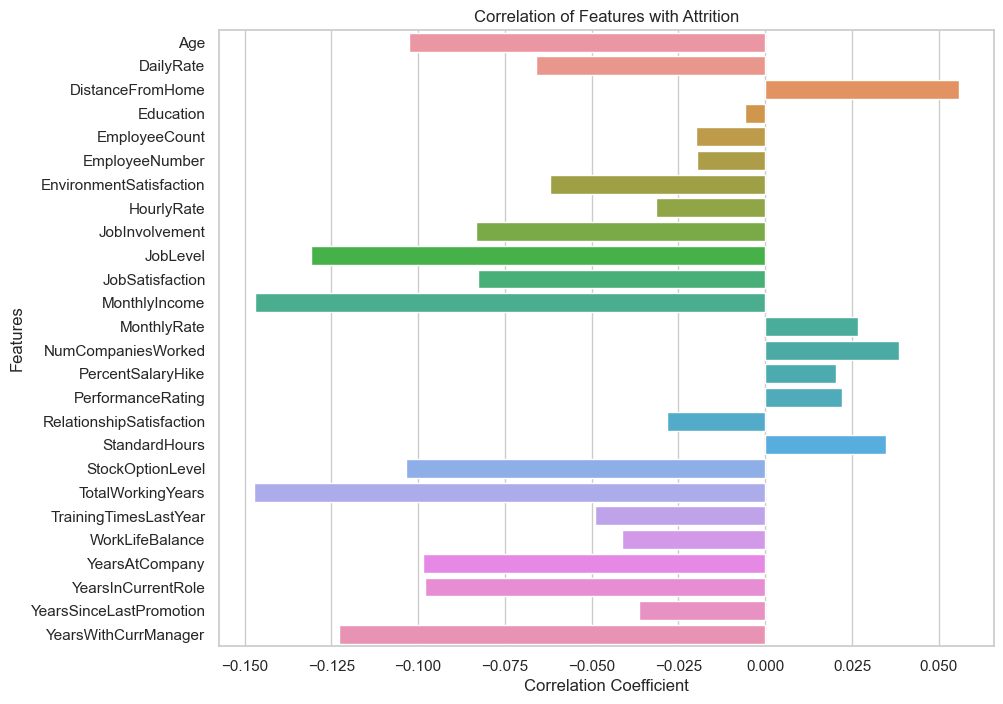

In [95]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

attrition_correlation = data.corr()['Attrition'].drop('Attrition')  # Drop self-correlation

# Create a bar plot for visualization
plt.figure(figsize=(10, 8))
sns.barplot(x=attrition_correlation.values, y=attrition_correlation.index)

# Set plot title and labels
plt.title('Correlation of Features with Attrition')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Show the plot
plt.show()


In [96]:
print(data['Attrition'].unique())


[1 0]


In [97]:
# Calculate overall attrition rate
attrition_rate = data['Attrition'].mean() * 100

# Display the attrition rate
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")


Overall Attrition Rate: 19.50%


In [98]:
# Group by 'Attrition' and calculate the mean for each group
attrition_table = data.groupby('Attrition').mean()

# Display the attrition table
print(attrition_table)


                Age   DailyRate  DistanceFromHome  Education  EmployeeCount  \
Attrition                                                                     
0          37.12690  816.123919          8.807332   2.940784       0.999782   
1          34.62659  747.789072          9.957752   2.924985       0.994767   

           EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
Attrition                                                        
0             1026.267394                 2.741927   66.062215   
1              996.214570                 2.564893   64.381072   

           JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
Attrition                                                             
0                2.775563  2.127133         2.773065    6903.899833   
1                2.613636  1.752805         2.536723    5132.625730   

            MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
Attrition                                                        
0

C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_2644\1602253360.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  attrition_table = data.groupby('Attrition').mean()


In [99]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 20) 

columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 
           'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 
           'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
           'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 
           'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

attrition_table = data.groupby('Attrition')[columns].mean()

# Display the table
print(attrition_table)


                Age   DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
Attrition                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
0          37.12690  816.123919          8.807332   2.940784       0.999782     

In [100]:
attrition_table = data.groupby('Attrition')[columns].mean().transpose()
print(attrition_table)


Attrition                        0             1
Age                      37.126900     34.626590
DailyRate               816.123919    747.789072
DistanceFromHome          8.807332      9.957752
Education                 2.940784      2.924985
EmployeeCount             0.999782      0.994767
EmployeeNumber         1026.267394    996.214570
EnvironmentSatisf...      2.741927      2.564893
HourlyRate               66.062215     64.381072
JobInvolvement            2.775563      2.613636
JobLevel                  2.127133      1.752805
JobSatisfaction           2.773065      2.536723
MonthlyIncome          6903.899833   5132.625730
MonthlyRate           14259.203509  14758.978160
NumCompaniesWorked        2.597528      2.845093
PercentSalaryHike        15.271083     15.476401
PerformanceRating         3.144277      3.170941
RelationshipSatis...      2.715597      2.635722
StandardHours            80.109330     80.798935
StockOptionLevel          0.870336      0.643547
TotalWorkingYears   

Age: Employees who left are on average younger (34.78 years) compared to those who stayed (37.03 years). This could indicate that younger employees are more likely to leave, possibly in search of better opportunities or career advancement.

Daily Rate: Employees who left had a lower average daily rate (752.20) than those who stayed (812.64). Financial factors might play a role in attrition.

Distance from Home: Those who left had a slightly higher average distance from home (9.86) compared to those who stayed (8.93). Commuting distance might be a minor factor in the decision to leave.

Education, Employee Count, and Employee Number: These features show little to no significant difference between the groups, suggesting they are not strong factors in attrition.

Environment Satisfaction & Job Satisfaction: Employees who left reported lower satisfaction levels in both environment (2.58) and job (2.55) compared to those who stayed (2.76 and 2.75, respectively). This highlights the importance of job satisfaction and work environment in retaining employees.

Monthly Income: A notable difference is observed here. Employees who left had a lower average monthly income (5269.46) compared to those who stayed (6816.19). This suggests that income is a significant factor in attrition.

Performance Rating and Percent Salary Hike: Slight differences are seen, but these are likely not major factors in attrition.

Work-Life Balance: Both groups have similar scores, indicating this might not be a primary factor in deciding to leave.

Years at Company, In Current Role, Since Last Promotion, With Current Manager: Employees who left generally spent less time in each of these categories. This could indicate that lack of advancement or long-term prospects within the company might influence the decision to leave.

In summary, younger employees, those with lower income, lower job satisfaction, and those who have spent fewer years at the company are more prone to leave. Factors like education, employee count, and performance ratings show less impact on attrition decisions. These insights can be vital for the company in developing strategies to improve employee retention, especially focusing on competitive compensation, career growth opportunities, and improving job satisfaction and work environment.

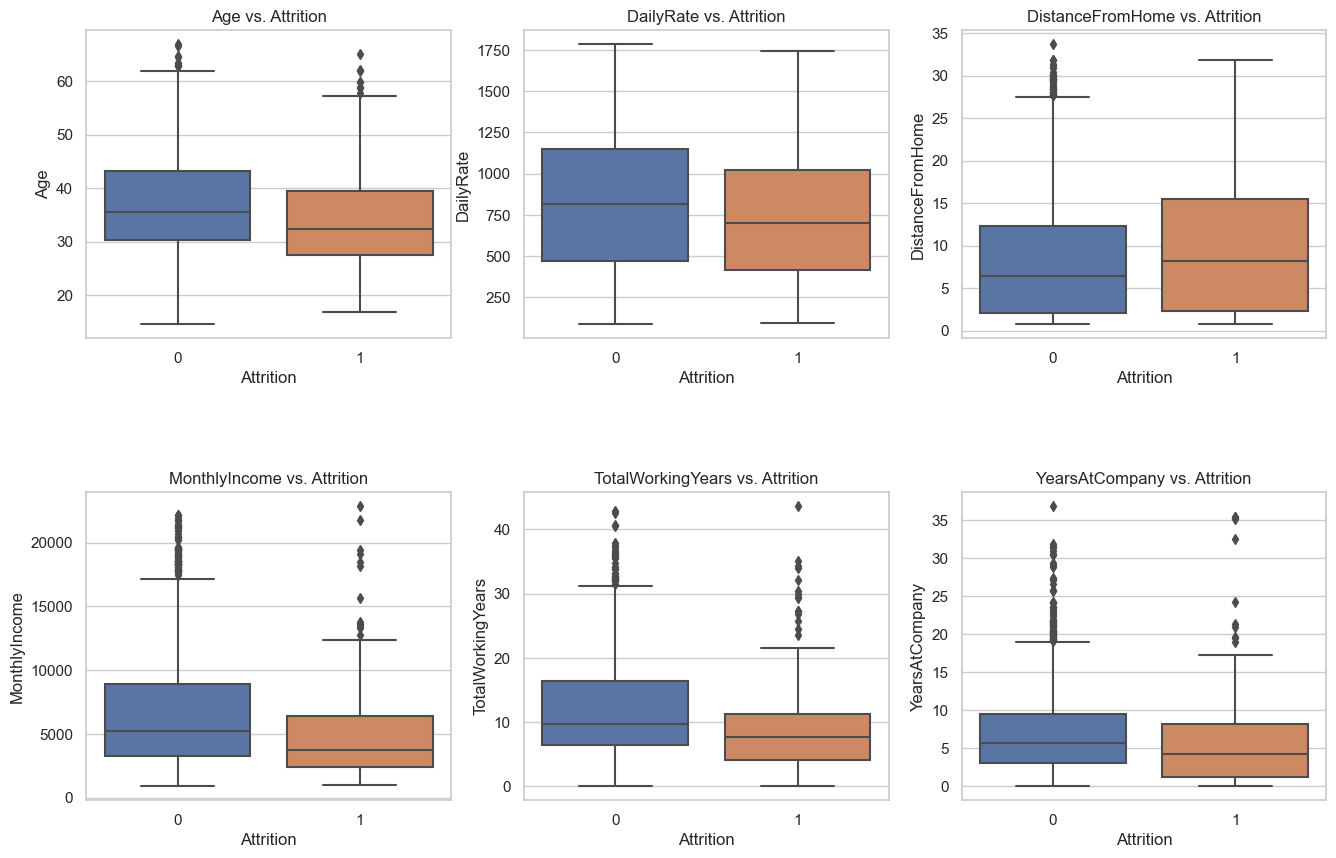

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for visualization
selected_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany'
]

# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(selected_features):
    ax = axes[i // 3, i % 3]
    sns.boxplot(data=data, x='Attrition', y=feature, ax=ax)
    ax.set_title(f'{feature} vs. Attrition')
    ax.set_xlabel('Attrition')
    ax.set_ylabel(feature)

plt.show()


In [105]:
import pandas as pd

# Assuming 'data' is your DataFrame
numerical_features = data.select_dtypes(include=['int64', 'float64'])
std_deviations = numerical_features.std()

print("Standard Deviations for Numerical Features:")
print(std_deviations)


Standard Deviations for Numerical Features:
Age                            9.758624
Attrition                      0.396359
DailyRate                    413.176128
DistanceFromHome               8.157560
Education                      1.067857
EmployeeCount                  0.099584
EmployeeNumber               613.819443
EnvironmentSatisfaction        1.128891
HourlyRate                    21.421135
JobInvolvement                 0.769210
JobLevel                       1.135010
JobSatisfaction                1.137665
MonthlyIncome               4782.254779
MonthlyRate                 7332.233658
NumCompaniesWorked             2.523616
PercentSalaryHike              3.992024
PerformanceRating              0.476906
RelationshipSatisfaction       1.119948
StandardHours                  7.956959
StockOptionLevel               0.864052
TotalWorkingYears              8.033646
TrainingTimesLastYear          1.333116
WorkLifeBalance                0.759873
YearsAtCompany                 5.990

In [106]:
numerical_features = data[['Age', 'DailyRate', 'MonthlyIncome']]  # Replace with your desired feature names
std_deviations = numerical_features.std()

print("Standard Deviations for Selected Numerical Features:")
print(std_deviations)


Standard Deviations for Selected Numerical Features:
Age                 9.758624
DailyRate         413.176128
MonthlyIncome    4782.254779
dtype: float64


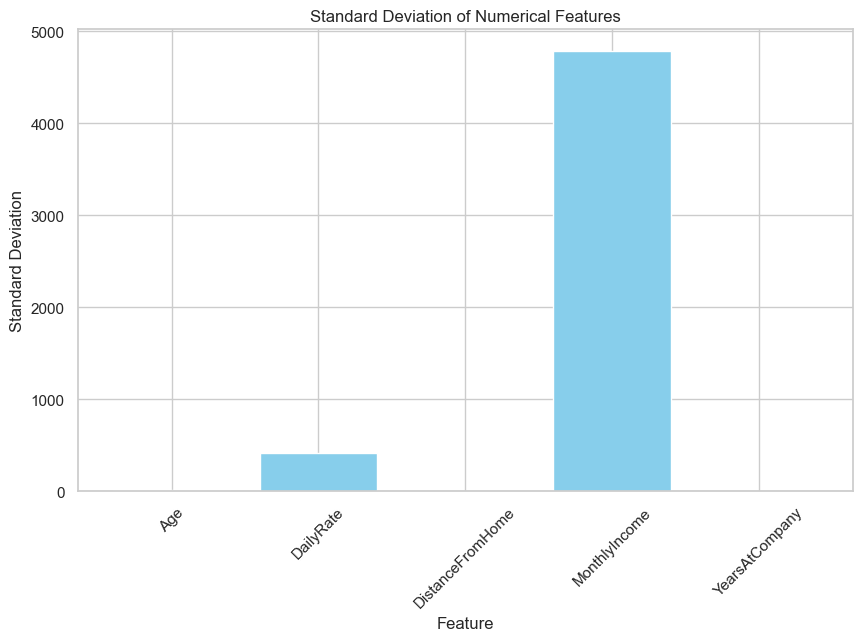

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Feature'], df['StandardDeviation'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Numerical Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()
